<a href="https://colab.research.google.com/github/hochschule-pforzheim/project-st23-team-ccpl/blob/main/V11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relevanz des Projekts**
Der Wettbewerbsdruck um Kunden steigt – sowohl in Produkt- als auch Dienstleistungsmärkten – seit Jahren, insbesondere getrieben durch die digitale Transformation der Wirtschaft. Dies führt dazu, dass eine individuelle Kundenansprache immer mehr an Bedeutung gewinnt, um die Kunden an das Unternehmen / die Marke zu binden und dadurch das Risiko der Kundenabwanderung zu minimieren (vgl. Gouthier, Kern (2021), S.129).
Der Wettbewerbsdruck um Kunden ist jedoch nicht für alle Kunden gleich. Je höher der erwartete Customer Lifetime Value eines Kunden ist, desto intensiver ist der Wettbewerb um einen solchen Kunden (vgl. Barak et al. (2020), S.52).
Der Customer Lifetime Value erfasst, wie wertvoll ein Kunde für ein Unternehmen ist und bietet somit einen Ansatz zur individuellen Kundenansprache. Denn je größer der Customer Lifetime Value eines Kunden ist, desto rentabler sind Kundenbindungsmaßnahmen, je niedriger der Customer Lifetime Value eines Kunden ist, desto notwendiger sind Maßnahmen zur Minimierung des Abwanderungsrisikos des Kunden (vgl. Engelen, Schneider (2021), S.13).

Verwendeter Datensatz: https://www.kaggle.com/datasets/pankajjsh06/ibm-watson-marketing-customer-value-data

## **Allgemeines Vorgehen**

**1. Data Preprocessing**

Um mit den vorliegenden Daten zielführende Analysen durchführen und Modelle entwickeln zu können, muss im ersten Schritt zunächst eine Aufbereitung der Daten erfolgen.

**2. Classification**

Zunächst gilt es, die Ist-Situation des Kundenstamms zu erfassen. Hierzu entwickeln wir ein Modell, welches auf Basis des Customer Lifetime Values für jeden einzelnen Kunden bestimmt, inwieweit dieser aktuell abwanderungsgefährdet ist (4 Kundenklassen auf Basis des Customer Lifetime Values: sehr abwanderungsgefährdet - gar nicht abwanderungsgefährdet).

**3. Regression**

Um das Unternehmen handlungsfähig zu machen, ist ein Blick in die Zukunft notwendig. Deshalb entwickeln wir im zweiten Schritt ein Modell, welches den Customer Lifetime Value für jeden einzelnen Kunden für die Zukunft vorhersagt.

**4. Clustering**

Mit dem Clustering wollen wir herausfinden, nach welchen weiteren Eigenschaften (abgesehen von dem Customer Lifetime Value) die Kunden in Gruppen eingeteilt werden können.


##**1. Data Preprocessing**

Grundlegende Vorbereitung zum Einlesen der Daten:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
#Daten einlesen
df = pd.read_csv("/content/sample_data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**Cleansing**

Nachfolgend wird der Datensatz aufbereitet:


*   Umbenennung der Überschriften
*   Überprüfung auf fehlende Werte (--> um bspw. die Qualität des Datensatzes zu prüfen und zu gewährleisten, dass die statistischen Analysen ohne Verzerrungen durchgeführt werden können)

*   Überprüfung auf Duplikate (--> Verzerrung s.o.)

In [ ]:
#Überschriften umbenennen
df.columns = df.columns.str.replace(' ', '_')
df.head()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
# Datensatz auf fehlende Werte überprüfen
df.isna().sum()

Customer                         0
State                            0
Customer_Lifetime_Value          0
Response                         0
Coverage                         0
Education                        0
Effective_To_Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location_Code                    0
Marital_Status                   0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
Policy_Type                      0
Policy                           0
Renew_Offer_Type                 0
Sales_Channel                    0
Total_Claim_Amount               0
Vehicle_Class                    0
Vehicle_Size                     0
dtype: int64

In [ ]:
#Datensatz auf Duplikate überprüfen
df.duplicated().sum()

0

Wir sehen, dass es weder fehlende Werte noch Duplikate im Datensatz gibt, daher können wir annehmen, dass die Ergebnisse der nachfolgenden Analysen ohne Verzerrungen interpretierbar sind.

###Exploration

Überblick über den Datensatz und Informationen über die Datenstruktur und den Dateninhalt erhalten:

In [ ]:
df.describe()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer_Lifetime_Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective_To_Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location_Code                  9134 non-null   object 
 11  Marital_Status                 9134 non-null   object 
 12  Monthly_Premium_Auto           9134 non-null   i

###**Encoding**

Wir betrachten im Folgenden Informationen über die Variable Customer Lifetime Value, da diese Werte anschließend die Grundlage für die Klassenbildung unserer Zielvariable CLV_Churn darstellen. Für die Festlegung der Grenzen der Klassen haben wir die Quartile (gerundet) verwendet, wodurch letztlich 4 Klassen entstehen (0,1,2,3).

In [ ]:
df.Customer_Lifetime_Value.describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer_Lifetime_Value, dtype: float64

In [ ]:
print(df.Customer_Lifetime_Value.min())
print(df.Customer_Lifetime_Value.max())

1898.007675
83325.38119


In [ ]:
# Zielvariable bestimmen (mehrere Kategorien)
from collections import Counter
from matplotlib import pyplot

CLV_churn = np.where(df.Customer_Lifetime_Value < 3994, 0, np.where(df.Customer_Lifetime_Value < 5780, 1, np.where(df.Customer_Lifetime_Value < 8962, 2, 3)))
CLV_churn

array([0, 2, 3, ..., 2, 2, 0])

In [ ]:
# In Data Frame umwandeln
df_1 = pd.DataFrame(CLV_churn,
                         columns=['CLV_churn'])
df_1

,CLV_churn
0,0
1,2
2,3
3,2
4,0
...,...
9129,3
9130,0
9131,2
9132,2


In [ ]:
# CLV_churn wieder an Datensatz anhängen
df_1 = pd.concat((df_1, df), axis=1)
df_1

,CLV_churn,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,2,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,3,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,2,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,0,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,0,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,2,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,2,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [ ]:
#Alt
#"Zielvariable" bestimmt: Alle mit CLV < 6000 sind Abwanderungsgefährdet (Da es ca. 50% sind) --> als extra Spalte dem Datensatz hinzugefügt
#df_1 = df.assign(CLV_churn = np.where(df['Customer_Lifetime_Value']<6000, 1, 0))
#df_1
#--> hier bei Classification zu hohe Werte

In [ ]:
#Datentypen anzeigen
df_1.dtypes

CLV_churn                          int64
Customer                          object
State                             object
Customer_Lifetime_Value          float64
Response                          object
Coverage                          object
Education                         object
Effective_To_Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location_Code                     object
Marital_Status                    object
Monthly_Premium_Auto               int64
Months_Since_Last_Claim            int64
Months_Since_Policy_Inception      int64
Number_of_Open_Complaints          int64
Number_of_Policies                 int64
Policy_Type                       object
Policy                            object
Renew_Offer_Type                  object
Sales_Channel                     object
Total_Claim_Amount               float64
Vehicle_Class                     object
Vehicle_Size    

In [ ]:
# Effective_To_Date in Datum transformiert
df_1['Effective_To_Date'] = pd.to_datetime(df_1['Effective_To_Date'])
df_1.dtypes

CLV_churn                                 int64
Customer                                 object
State                                    object
Customer_Lifetime_Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective_To_Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location_Code                            object
Marital_Status                           object
Monthly_Premium_Auto                      int64
Months_Since_Last_Claim                   int64
Months_Since_Policy_Inception             int64
Number_of_Open_Complaints                 int64
Number_of_Policies                        int64
Policy_Type                              object
Policy                                   object
Renew_Offer_Type                        

In [ ]:
df_1['EmploymentStatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

Einteilung der Variablen mit dem Datentyp "object" für die Codierung:

nominal (ohne Reihenfolge): State, EmploymentStatus, Gender, Marital_Status, Policy_Type, Policy, Renew_Offer_Type , Sales_Channel, Vehicle_Class, Response

ordinal (mit Reihenfolge): Coverage, Education, Location_Code, Vehicle_Size


In [ ]:
# Für nominal Werte Dummy erzeugen
dummy_liste = df_1.loc[:,['State','EmploymentStatus', 'Gender', 'Marital_Status', 'Policy_Type', 'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class', 'Response']]
dummys=pd.get_dummies(dummy_liste)
dummys

,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,...,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car,Response_No,Response_Yes
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,1,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
9130,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9131,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
9132,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Dummys dem Datensatz hinzufügen
df_1_mitdummys = pd.concat((df_1, dummys), axis=1)
df_1_mitdummys = df_1_mitdummys.drop(['State','EmploymentStatus', 'Gender', 'Marital_Status', 'Policy_Type', 'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class', 'Response'],1)
df_1_mitdummys.dtypes

<ipython-input-19-d38c3ed9cbd8>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_1_mitdummys = df_1_mitdummys.drop(['State','EmploymentStatus', 'Gender', 'Marital_Status', 'Policy_Type', 'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class', 'Response'],1)


CLV_churn                                  int64
Customer                                  object
Customer_Lifetime_Value                  float64
Coverage                                  object
Education                                 object
Effective_To_Date                 datetime64[ns]
Income                                     int64
Location_Code                             object
Monthly_Premium_Auto                       int64
Months_Since_Last_Claim                    int64
Months_Since_Policy_Inception              int64
Number_of_Open_Complaints                  int64
Number_of_Policies                         int64
Total_Claim_Amount                       float64
Vehicle_Size                              object
State_Arizona                              uint8
State_California                           uint8
State_Nevada                               uint8
State_Oregon                               uint8
State_Washington                           uint8
EmploymentStatus_Dis

In [ ]:
df_1_mitdummys['Coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

**Mapping der ordinalen Daten**

**Funktion**: Ordinale Daten repräsentieren Werte, die eine natürliche Reihenfolge haben aber keine quantitativen Abstände zwischen den Werten aufweisen. Den Daten weisen wir daher numerische Werte zu, die ihre Rangordnung wiederspiegeln und uns Analysen mit ihnen durchführen lassen.


In [ ]:
# Für ordinale Daten mapping machen
coverage_mapping = {
    'Basic': 0,
    'Extended': 1,
    'Premium': 2,
}
df_1_mitdummys.Coverage = df_1_mitdummys.Coverage.apply(lambda x: coverage_mapping[x])

In [ ]:
df_1_mitdummys

,CLV_churn,Customer,Customer_Lifetime_Value,Coverage,Education,Effective_To_Date,Income,Location_Code,Monthly_Premium_Auto,Months_Since_Last_Claim,...,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car,Response_No,Response_Yes
0,0,BU79786,2763.519279,0,Bachelor,2011-02-24,56274,Suburban,69,32,...,0,0,0,0,0,0,0,1,1,0
1,2,QZ44356,6979.535903,1,Bachelor,2011-01-31,0,Suburban,94,13,...,0,0,1,0,0,0,0,0,1,0
2,3,AI49188,12887.431650,2,Bachelor,2011-02-19,48767,Suburban,108,18,...,0,0,0,0,0,0,0,1,1,0
3,2,WW63253,7645.861827,0,Bachelor,2011-01-20,0,Suburban,106,18,...,1,0,0,0,0,1,0,0,1,0
4,0,HB64268,2813.692575,0,Bachelor,2011-02-03,43836,Rural,73,12,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3,LA72316,23405.987980,0,Bachelor,2011-02-10,71941,Urban,73,18,...,0,1,1,0,0,0,0,0,1,0
9130,0,PK87824,3096.511217,1,College,2011-02-12,21604,Suburban,79,14,...,0,0,1,0,0,0,0,0,0,1
9131,2,TD14365,8163.890428,1,Bachelor,2011-02-06,0,Suburban,85,9,...,0,0,1,0,0,0,0,0,1,0
9132,2,UP19263,7524.442436,1,College,2011-02-03,21941,Suburban,96,34,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
education_mapping = {
    'High School or Below': 0,
    'College': 1,
    'Bachelor': 2,
    'Master': 3,
    'Doctor': 4,
}
df_1_mitdummys.Education = df_1_mitdummys.Education.apply(lambda x: education_mapping[x])

In [ ]:
Vehicle_Size_mapping = {
    'Small': 0,
    'Medsize': 1,
    'Large': 2,
}
df_1_mitdummys.Vehicle_Size = df_1_mitdummys.Vehicle_Size.apply(lambda x: Vehicle_Size_mapping[x])

In [ ]:
Location_Code_mapping = {
    'Rural': 0,
    'Suburban': 1,
    'Urban': 2,
}
df_1_mitdummys.Location_Code = df_1_mitdummys.Location_Code.apply(lambda x: Location_Code_mapping[x])

In [ ]:
#df_final = pd.concat((df_1_mitdummys, df.Coverage, df.Education, df.Vehicle_Size, df.Location_Code), axis=1)

In [ ]:
df_1_mitdummys

,CLV_churn,Customer,Customer_Lifetime_Value,Coverage,Education,Effective_To_Date,Income,Location_Code,Monthly_Premium_Auto,Months_Since_Last_Claim,...,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car,Response_No,Response_Yes
0,0,BU79786,2763.519279,0,2,2011-02-24,56274,1,69,32,...,0,0,0,0,0,0,0,1,1,0
1,2,QZ44356,6979.535903,1,2,2011-01-31,0,1,94,13,...,0,0,1,0,0,0,0,0,1,0
2,3,AI49188,12887.431650,2,2,2011-02-19,48767,1,108,18,...,0,0,0,0,0,0,0,1,1,0
3,2,WW63253,7645.861827,0,2,2011-01-20,0,1,106,18,...,1,0,0,0,0,1,0,0,1,0
4,0,HB64268,2813.692575,0,2,2011-02-03,43836,0,73,12,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3,LA72316,23405.987980,0,2,2011-02-10,71941,2,73,18,...,0,1,1,0,0,0,0,0,1,0
9130,0,PK87824,3096.511217,1,1,2011-02-12,21604,1,79,14,...,0,0,1,0,0,0,0,0,0,1
9131,2,TD14365,8163.890428,1,2,2011-02-06,0,1,85,9,...,0,0,1,0,0,0,0,0,1,0
9132,2,UP19263,7524.442436,1,1,2011-02-03,21941,1,96,34,...,0,0,1,0,0,0,0,0,1,0


--> Hier sind jetzt alle mapping data im Datensatz enthalten (Aber doppelt: 1x als object und 1x als int.)

In [ ]:
#Metrische Variable für Regression
target_regression = df_1_mitdummys.loc[:,'Customer_Lifetime_Value']

In [ ]:
#Customer und CLV gelöscht
df_1_mitdummys = df_1_mitdummys.drop(['Customer', 'Customer_Lifetime_Value'],1)


<ipython-input-28-33512760453f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_1_mitdummys = df_1_mitdummys.drop(['Customer', 'Customer_Lifetime_Value'],1)


In [ ]:
#Löschen von jeweils einem Dummy
df_1_mitdummys = df_1_mitdummys.drop(['State_Washington', 'EmploymentStatus_Unemployed', 'Gender_M', 'Marital_Status_Single', 'Policy_Type_Special Auto', 'Policy_Special L3', 'Renew_Offer_Type_Offer4', 'Sales_Channel_Web', 'Vehicle_Class_Two-Door Car', 'Response_Yes'],1)


<ipython-input-29-705fd9f515a6>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_1_mitdummys = df_1_mitdummys.drop(['State_Washington', 'EmploymentStatus_Unemployed', 'Gender_M', 'Marital_Status_Single', 'Policy_Type_Special Auto', 'Policy_Special L3', 'Renew_Offer_Type_Offer4', 'Sales_Channel_Web', 'Vehicle_Class_Two-Door Car', 'Response_Yes'],1)


In [ ]:
df_1_mitdummys.dtypes

CLV_churn                                  int64
Coverage                                   int64
Education                                  int64
Effective_To_Date                 datetime64[ns]
Income                                     int64
Location_Code                              int64
Monthly_Premium_Auto                       int64
Months_Since_Last_Claim                    int64
Months_Since_Policy_Inception              int64
Number_of_Open_Complaints                  int64
Number_of_Policies                         int64
Total_Claim_Amount                       float64
Vehicle_Size                               int64
State_Arizona                              uint8
State_California                           uint8
State_Nevada                               uint8
State_Oregon                               uint8
EmploymentStatus_Disabled                  uint8
EmploymentStatus_Employed                  uint8
EmploymentStatus_Medical Leave             uint8
EmploymentStatus_Ret

In [ ]:
df_1_mitdummys

,CLV_churn,Coverage,Education,Effective_To_Date,Income,Location_Code,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,...,Renew_Offer_Type_Offer3,Sales_Channel_Agent,Sales_Channel_Branch,Sales_Channel_Call Center,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Response_No
0,0,0,2,2011-02-24,56274,1,69,32,5,0,...,0,1,0,0,0,0,0,0,0,1
1,2,1,2,2011-01-31,0,1,94,13,42,0,...,1,1,0,0,1,0,0,0,0,1
2,3,2,2,2011-02-19,48767,1,108,18,38,0,...,0,1,0,0,0,0,0,0,0,1
3,2,0,2,2011-01-20,0,1,106,18,65,0,...,0,0,0,1,0,0,0,1,0,1
4,0,0,2,2011-02-03,43836,0,73,12,44,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3,0,2,2011-02-10,71941,2,73,18,89,0,...,0,0,0,0,1,0,0,0,0,1
9130,0,1,1,2011-02-12,21604,1,79,14,28,0,...,0,0,1,0,1,0,0,0,0,0
9131,2,1,2,2011-02-06,0,1,85,9,37,3,...,0,0,1,0,1,0,0,0,0,1
9132,2,1,1,2011-02-03,21941,1,96,34,3,0,...,1,0,1,0,1,0,0,0,0,1


**!!Versuch!!**

Wir haben getetstet ob wir nur die x unskaliert rausziehen können, um unten die eigenschaften der Kunden die falsch identifiziert wurden herauszufinden

In [ ]:
#Hier habe ich df_1_mitdummys kopiert und Y = CLV_churn rausgeschmissen. Alles ist unskaliert. Das benötigen wir nachher in der Visualisierung der Methoden und Vergleich der Variablen untereinander.
#x_unskaliert_mitdummys = df_1_mitdummys.copy()
#x_unskaliert_mitdummys = x_unskaliert_mitdummys.drop("CLV_churn", axis=1)
#x_unskaliert_mitdummys = df_1_mitdummys.copy()
#columns_to_drop = ["CLV_churn", "Effective_To_Date", "Total_Claim_Amount"]
#x_unskaliert_mitdummys = x_unskaliert_mitdummys.drop(columns_to_drop, axis=1)



SyntaxError: ignored

In [ ]:
#x_unskaliert_mitdummys

In [ ]:
# Versuch die object Duplikate zu löschen --> löscht aber alles
#duplikate = data.columns.duplicated(keep='last')
#duplikate
#zu_loeschende_spalte = data.columns[duplikate]
#data = df_final.drop(zu_loeschende_spalte, axis=1)

In [ ]:
#Versuch alle objects zu löschen --> löscht aber alles
#object_columns = df_final.select_dtypes(include=['object']).columns
#object_columns
#df_final = df_final.drop(object_columns, axis=1)

###**Scaling**

Wir skalieren hier die Features, um sicherzustellen, dass sie auf der gleichen Skala liegen und keine einzelnen Features aufgrund ihrer Größenordnung dominieren, was wichtig für bestimmte Algorithmen wie KNN ist.

Der StandardScaler transformiert die Daten, sodass sie eine Standardnormalverteilung haben (Mittelwert von 0 und Standardabweichung von 1).

Als Vorbereitung für die Classification haben wir 3 Varianten des Scalings durchgeführt:

 1. alle Features (X) skaliert

 2. Alle Features skaliert (X) außer den Dummies

 3. Zielvariable (y) skaliert

In [ ]:
#Kopie erstellen
data_clean = df_1_mitdummys.copy()
data_clean.dtypes

CLV_churn                                  int64
Coverage                                   int64
Education                                  int64
Effective_To_Date                 datetime64[ns]
Income                                     int64
Location_Code                              int64
Monthly_Premium_Auto                       int64
Months_Since_Last_Claim                    int64
Months_Since_Policy_Inception              int64
Number_of_Open_Complaints                  int64
Number_of_Policies                         int64
Total_Claim_Amount                       float64
Vehicle_Size                               int64
State_Arizona                              uint8
State_California                           uint8
State_Nevada                               uint8
State_Oregon                               uint8
EmploymentStatus_Disabled                  uint8
EmploymentStatus_Employed                  uint8
EmploymentStatus_Medical Leave             uint8
EmploymentStatus_Ret

####**Alle X skaliert**

In [ ]:
#Alle features (X) skaliert
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

columns_to_scale = data_clean.loc[:,['Coverage', 'Education', 'Income', 'Location_Code', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Vehicle_Size',
                                     'State_Arizona','State_California', 'State_Nevada', 'State_Oregon',
                                     'EmploymentStatus_Disabled', 'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
                                     'Gender_F',
                                     'Marital_Status_Divorced', 'Marital_Status_Married',
                                     'Policy_Type_Corporate Auto', 'Policy_Type_Personal Auto',
                                     'Policy_Corporate L1', 'Policy_Corporate L2', 'Policy_Corporate L3',
                                     'Policy_Personal L1', 'Policy_Personal L2', 'Policy_Personal L3',
                                     'Policy_Special L1', 'Policy_Special L2',
                                     'Renew_Offer_Type_Offer1', 'Renew_Offer_Type_Offer2', 'Renew_Offer_Type_Offer3',
                                     'Sales_Channel_Agent', 'Sales_Channel_Branch', 'Sales_Channel_Call Center',
                                     'Vehicle_Class_Four-Door Car', 'Vehicle_Class_Luxury Car', 'Vehicle_Class_Luxury SUV', 'Vehicle_Class_SUV', 'Vehicle_Class_Sports Car',
                                     'Response_No']]
features_std = std_scaler.fit_transform(columns_to_scale)
features_std

array([[-0.73289946,  0.65895932,  0.61282744, ..., -0.49472552,
        -0.23654547,  0.40882171],
       [ 0.79199887,  0.65895932, -1.23961684, ..., -0.49472552,
        -0.23654547,  0.40882171],
       [ 2.31689721,  0.65895932,  0.36570978, ..., -0.49472552,
        -0.23654547,  0.40882171],
       ...,
       [ 0.79199887,  0.65895932, -1.23961684, ..., -0.49472552,
        -0.23654547,  0.40882171],
       [ 0.79199887, -0.26703059, -0.51735647, ..., -0.49472552,
        -0.23654547,  0.40882171],
       [ 0.79199887, -0.26703059, -1.23961684, ..., -0.49472552,
        -0.23654547,  0.40882171]])

In [ ]:
# Alle features (X) in Data Frame umgewandelt
X = pd.DataFrame(features_std,
                         columns=['Coverage', 'Education', 'Income', 'Location_Code', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Vehicle_Size',
                                     'State_Arizona','State_California', 'State_Nevada', 'State_Oregon',
                                     'EmploymentStatus_Disabled', 'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
                                     'Gender_F',
                                     'Marital_Status_Divorced', 'Marital_Status_Married',
                                     'Policy_Type_Corporate Auto', 'Policy_Type_Personal Auto',
                                     'Policy_Corporate L1', 'Policy_Corporate L2', 'Policy_Corporate L3',
                                     'Policy_Personal L1', 'Policy_Personal L2', 'Policy_Personal L3',
                                     'Policy_Special L1', 'Policy_Special L2',
                                     'Renew_Offer_Type_Offer1', 'Renew_Offer_Type_Offer2', 'Renew_Offer_Type_Offer3',
                                     'Sales_Channel_Agent', 'Sales_Channel_Branch', 'Sales_Channel_Call Center',
                                     'Vehicle_Class_Four-Door Car', 'Vehicle_Class_Luxury Car', 'Vehicle_Class_Luxury SUV', 'Vehicle_Class_SUV', 'Vehicle_Class_Sports Car',
                                     'Response_No'])
X.dtypes

Coverage                          float64
Education                         float64
Income                            float64
Location_Code                     float64
Monthly_Premium_Auto              float64
Months_Since_Last_Claim           float64
Months_Since_Policy_Inception     float64
Number_of_Open_Complaints         float64
Number_of_Policies                float64
Vehicle_Size                      float64
State_Arizona                     float64
State_California                  float64
State_Nevada                      float64
State_Oregon                      float64
EmploymentStatus_Disabled         float64
EmploymentStatus_Employed         float64
EmploymentStatus_Medical Leave    float64
EmploymentStatus_Retired          float64
Gender_F                          float64
Marital_Status_Divorced           float64
Marital_Status_Married            float64
Policy_Type_Corporate Auto        float64
Policy_Type_Personal Auto         float64
Policy_Corporate L1               

####**Alle X skaliert außer Dummys**

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

columns_to_scale_2 = data_clean.loc[:,['Coverage', 'Education', 'Income', 'Location_Code', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Vehicle_Size']]
features_std_2 = std_scaler.fit_transform(columns_to_scale_2)
features_std_2

array([[-0.73289946,  0.65895932,  0.61282744, ..., -0.42224956,
        -0.82264788,  0.16668206],
       [ 0.79199887,  0.65895932, -1.23961684, ..., -0.42224956,
         2.10615996,  0.16668206],
       [ 2.31689721,  0.65895932,  0.36570978, ..., -0.42224956,
        -0.40424676,  0.16668206],
       ...,
       [ 0.79199887,  0.65895932, -1.23961684, ...,  2.87324529,
        -0.40424676,  0.16668206],
       [ 0.79199887, -0.26703059, -0.51735647, ..., -0.42224956,
         0.01415436,  2.0278971 ],
       [ 0.79199887, -0.26703059, -1.23961684, ..., -0.42224956,
        -0.82264788,  0.16668206]])

In [ ]:
X_skaliert_ohneDummies = pd.DataFrame(features_std_2,
                         columns=['Coverage', 'Education', 'Income', 'Location_Code', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Vehicle_Size'])
X_skaliert_ohneDummies

,Coverage,Education,Income,Location_Code,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Vehicle_Size
0,-0.732899,0.658959,0.612827,0.034524,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,0.166682
1,0.791999,0.658959,-1.239617,0.034524,0.022691,-0.208186,-0.217334,-0.422250,2.106160,0.166682
2,2.316897,0.658959,0.365710,0.034524,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.166682
3,-0.732899,0.658959,-1.239617,0.034524,0.371467,0.288205,0.606907,-0.422250,1.687759,0.166682
4,-0.732899,0.658959,0.203390,-1.616461,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,0.166682
...,...,...,...,...,...,...,...,...,...,...
9129,-0.732899,0.658959,1.128558,1.685508,-0.587666,0.288205,1.466984,-0.422250,-0.404247,0.166682
9130,0.791999,-0.267031,-0.528450,0.034524,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,0.166682
9131,0.791999,0.658959,-1.239617,0.034524,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,0.166682
9132,0.791999,-0.267031,-0.517356,0.034524,0.080820,1.876656,-1.614960,-0.422250,0.014154,2.027897


In [ ]:
# Unskalierte Dummies hinzufügen
dummys_ohne_referenz = data_clean.loc[:,['State_Arizona','State_California', 'State_Nevada', 'State_Oregon',
                                     'EmploymentStatus_Disabled', 'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
                                     'Gender_F',
                                     'Marital_Status_Divorced', 'Marital_Status_Married',
                                     'Policy_Type_Corporate Auto', 'Policy_Type_Personal Auto',
                                     'Policy_Corporate L1', 'Policy_Corporate L2', 'Policy_Corporate L3',
                                     'Policy_Personal L1', 'Policy_Personal L2', 'Policy_Personal L3',
                                     'Policy_Special L1', 'Policy_Special L2',
                                     'Renew_Offer_Type_Offer1', 'Renew_Offer_Type_Offer2', 'Renew_Offer_Type_Offer3',
                                     'Sales_Channel_Agent', 'Sales_Channel_Branch', 'Sales_Channel_Call Center',
                                     'Vehicle_Class_Four-Door Car', 'Vehicle_Class_Luxury Car', 'Vehicle_Class_Luxury SUV', 'Vehicle_Class_SUV', 'Vehicle_Class_Sports Car',
                                     'Response_No']]

X_skaliert_ohneDummies = pd.concat((X_skaliert_ohneDummies, dummys_ohne_referenz), axis=1)
X_skaliert_ohneDummies


,Coverage,Education,Income,Location_Code,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Vehicle_Size,...,Renew_Offer_Type_Offer3,Sales_Channel_Agent,Sales_Channel_Branch,Sales_Channel_Call Center,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Response_No
0,-0.732899,0.658959,0.612827,0.034524,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,0.166682,...,0,1,0,0,0,0,0,0,0,1
1,0.791999,0.658959,-1.239617,0.034524,0.022691,-0.208186,-0.217334,-0.422250,2.106160,0.166682,...,1,1,0,0,1,0,0,0,0,1
2,2.316897,0.658959,0.365710,0.034524,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.166682,...,0,1,0,0,0,0,0,0,0,1
3,-0.732899,0.658959,-1.239617,0.034524,0.371467,0.288205,0.606907,-0.422250,1.687759,0.166682,...,0,0,0,1,0,0,0,1,0,1
4,-0.732899,0.658959,0.203390,-1.616461,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,0.166682,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,-0.732899,0.658959,1.128558,1.685508,-0.587666,0.288205,1.466984,-0.422250,-0.404247,0.166682,...,0,0,0,0,1,0,0,0,0,1
9130,0.791999,-0.267031,-0.528450,0.034524,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,0.166682,...,0,0,1,0,1,0,0,0,0,0
9131,0.791999,0.658959,-1.239617,0.034524,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,0.166682,...,0,0,1,0,1,0,0,0,0,1
9132,0.791999,-0.267031,-0.517356,0.034524,0.080820,1.876656,-1.614960,-0.422250,0.014154,2.027897,...,1,0,1,0,1,0,0,0,0,1


####**Zielvariable definiert (skaliert und unskaliert)**

In [ ]:
#Zielvariable unskaliert
y_unskaliert = data_clean.loc[:, 'CLV_churn']

In [ ]:
#Zielvariable skaliert
y_skaliert = data_clean.loc[:,['CLV_churn']]
y_skaliert = std_scaler.fit_transform(y_skaliert)
y_skaliert = pd.DataFrame(y_skaliert,columns=['CLV_churn']) #in DataFrame umwandeln
y_skaliert

,CLV_churn
0,-1.342013
1,0.446685
2,1.341034
3,0.446685
4,-1.342013
...,...
9129,1.341034
9130,-1.342013
9131,0.446685
9132,0.446685


**Überblick:**
*   Alle Features skaliert = X_skaliert
*   Alle Features außer Dummies skaliert = X_skaliert_ohneDummies
*   Zielvariable skaliert = y_skaliert
*   Zielvariable unskaliert = y_unskaliert










###**Visualization**

Für eine schnelle Übersicht über unserer Daten, haben wir uns für die Erstellung von Histogrammen (Häufigkeitsverteilung) entschieden.
Neben der Verteilung der Daten können wir ebenfalls schnell erkennen, ob es ggf. Ausreißer oder andere Auffälligkeiten in der Verteilung der Daten gibt.


<Axes: title={'center': 'CLV_churn'}>

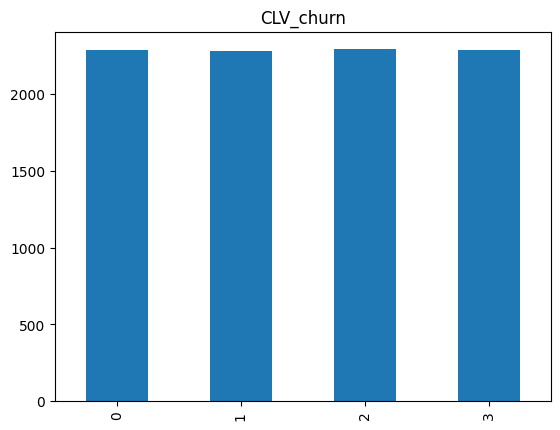

In [ ]:
# Verteilung der ZV anschauen
import matplotlib.pyplot as plt
fig = plt.figure()
df_1['CLV_churn'].value_counts(sort=False).sort_index().plot(kind='bar', title='CLV_churn')

Unser Datensatz ist balanciert / Die Klassen sind ausgewogen , daher betrachten wir im weiteren Verlauf den Wert der Accuracy (vgl. Chicco, Jurman (2020)).

In [ ]:
# kodierte & nicht kodierte Spalten in einem DataFrame:

encoded_columns = list(dummy_liste.columns)
numerical_columns = list(set(df_1_mitdummys.columns) - set(encoded_columns))


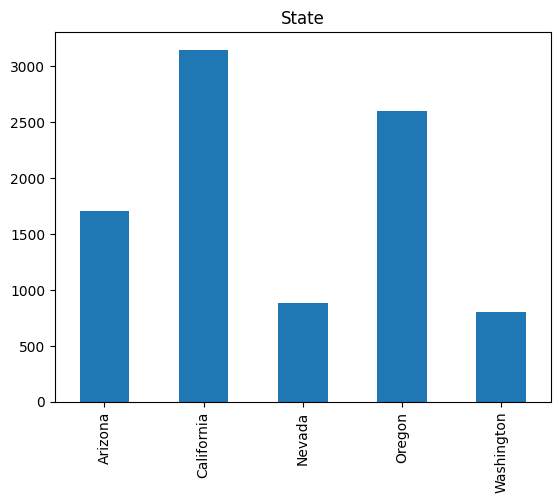

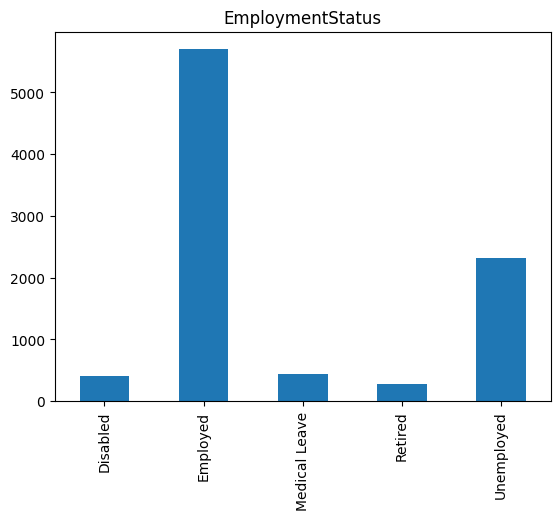

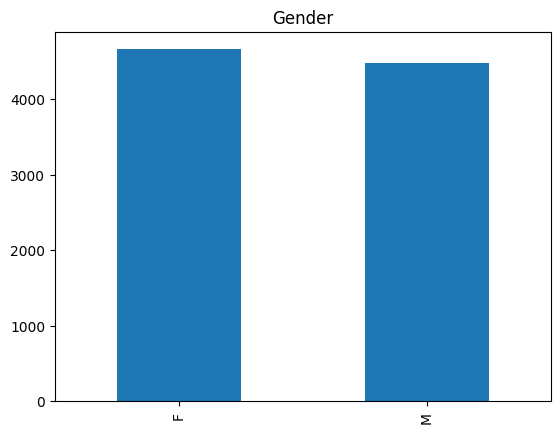

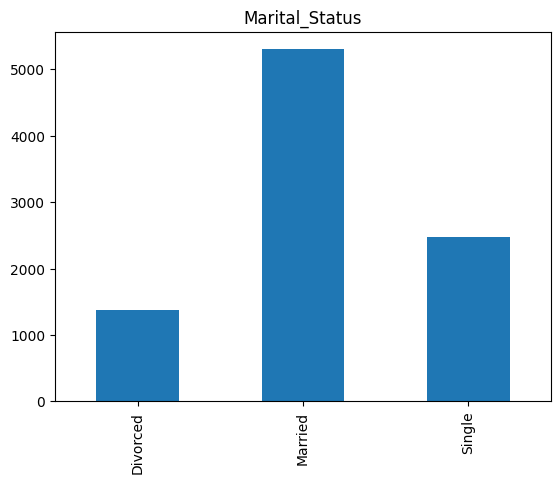

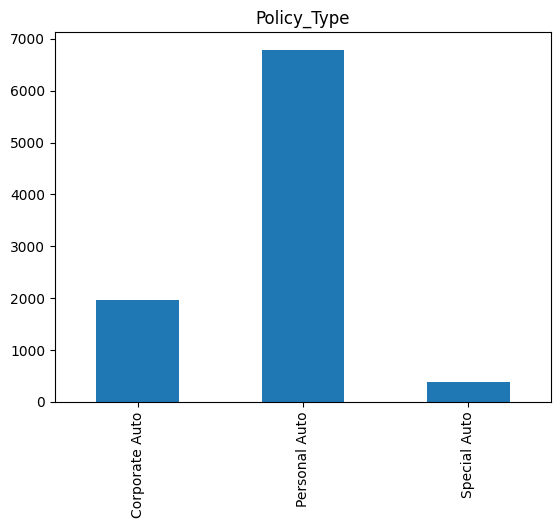

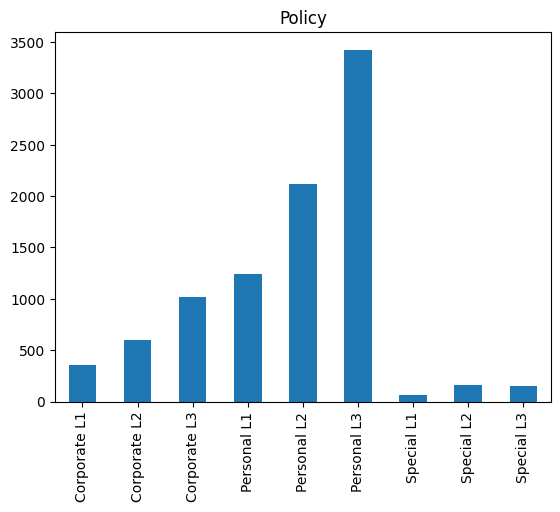

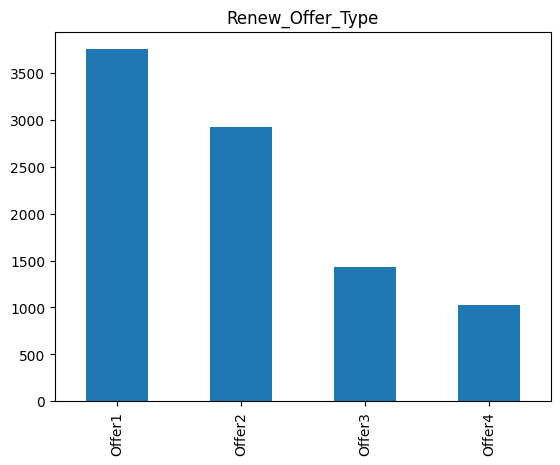

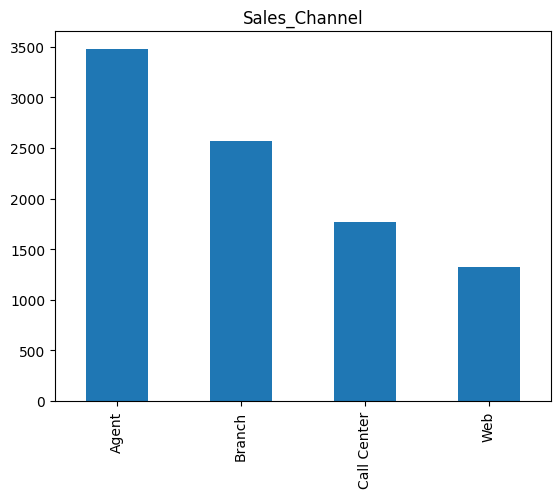

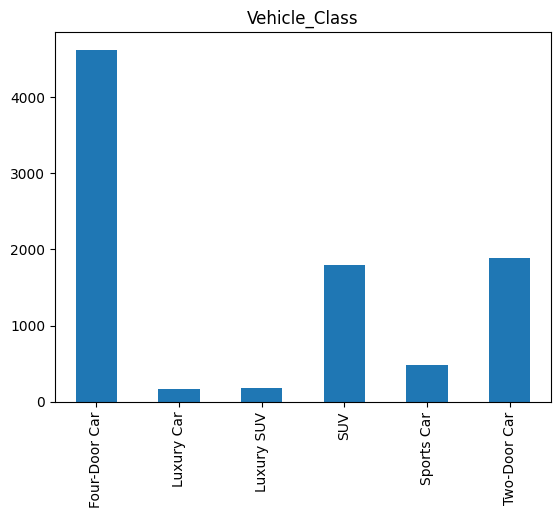

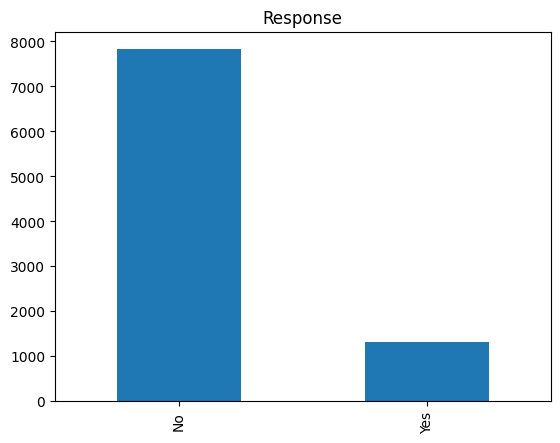

In [ ]:
#plotten
import matplotlib.pyplot as plt
for column in encoded_columns:
    fig = plt.figure()
    dummy_liste[column].value_counts(sort=False).sort_index().plot(kind='bar', title=column)

Wir sehen nun mit wenigen Blicken, dass beispielsweise...
*   ... die meisten Kunden in California oder Oregon angesiedelt sind
*   ... die meisten Kunden berufstätig sind aber auch dass die 2. häufigste Kategorie die der arbeitslosen ist
*   ... das Geschlecht sehr ausgeglichen verteilt ist
*   ... der großteil der Kunden Verheiratet ist, danach folgen Single und Geschieden
*   ... die meisten ein privates Auto besitzen
*   ... der beste Sales Channel über einen Agent ist
*   ... die meisten einen 4-Türer, gefolgt von einem 2-Türer und SUV fahren












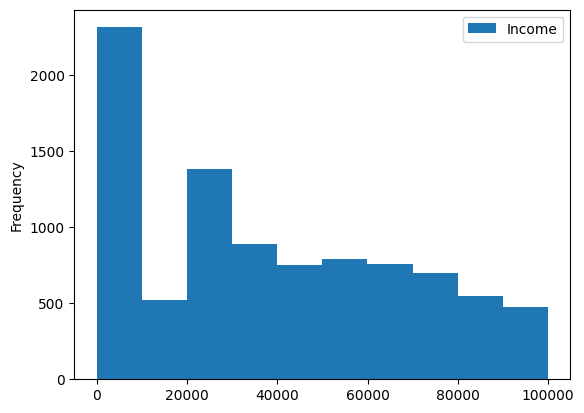

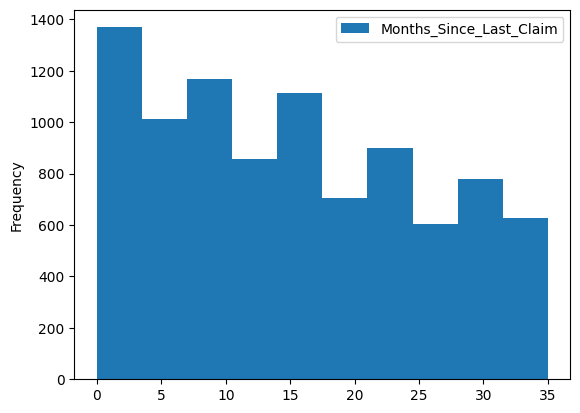

In [ ]:
#for column in numerical_columns:
 #   df_1_mitdummys.plot(kind='hist', y=column)

columns_to_plot = ["Income", "Months_Since_Last_Claim"]

for column in columns_to_plot:
    df_1_mitdummys.plot(kind='hist', y=column)

In [ ]:
df_corr =  df_1_mitdummys.corr('spearman').round(1)

<ipython-input-44-a272f6ecdb0a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr =  df_1_mitdummys.corr('spearman').round(1)


Text(0.5, 1.0, 'Spearman correlation between variables')

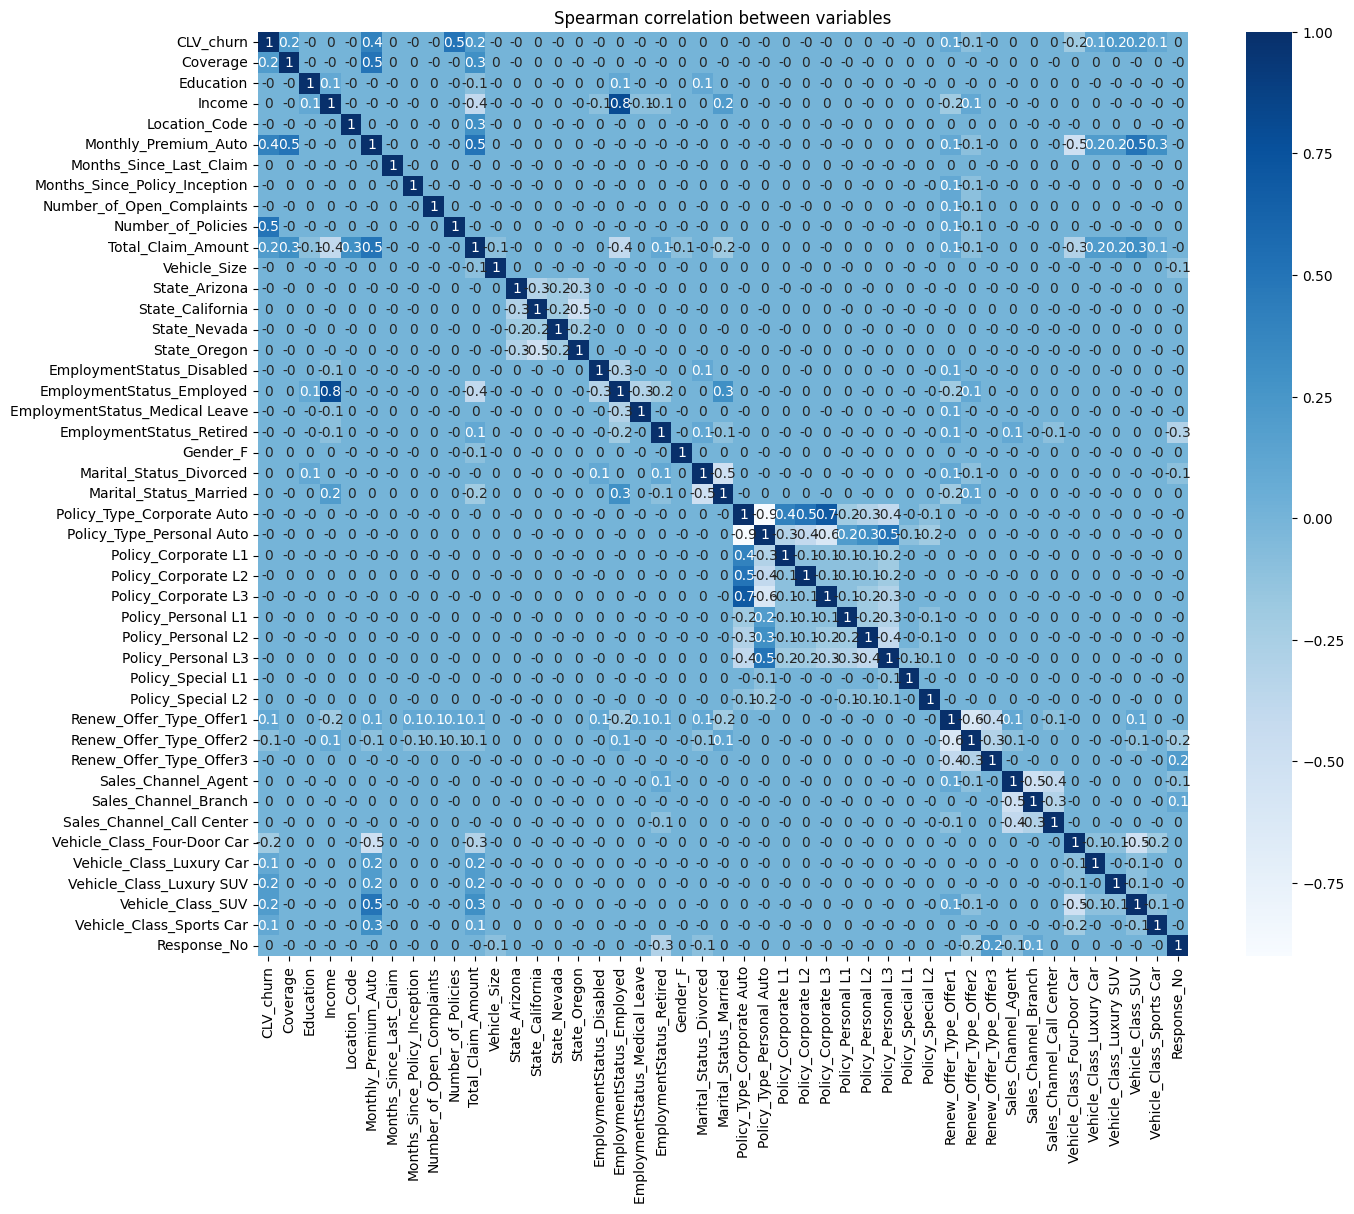

In [ ]:
#Korrelations-Heatmap
import seaborn as sns

plt.figure(figsize=(15, 12))
ax = sns.heatmap(df_corr, annot=True, cmap='Blues')
plt.title("Spearman correlation between variables")

**Interpretation Heatmap:**

Die Heatmap zeigt die Korrelation der Variablen untereinander. Je stärker die Korrelation ist, desto näher liegt der Wert an 1 und desto dunkler ist das Feld eingefärbt.

Bsp.: positive Korrelation (0,5) zwischen Number of Policies und CLV_churn.

Bsp.: negative Korrelation (-0,5) zwischen Monthly Premium Auto und Vehicle Class Four-Door Car.

Die Diagonale beschreibt die Korrelation einer Variable mit sich selbst (1).

##**2. Classification**

**Recap:**

Nun wollen wir die Ist-Situation des Kundenstamms erfassen.

Dafür werden die einzelnen Kunden jeweils auf Basis ihres Customer Lifetime Values in 4 Klassen eingeteilt (sehr abwanderungsgefährdet - gar nicht abwanderungsgefährdet)

Wir vergleichen insgesamt 5 Methoden: KNN, Logistische Regression, Decision Tree, Random Forest sowie XG Boost.

Dabei haben wir immer 3 Varianten je Methode getestet:

*   y skaliert, X unskaliert
*   y unskaliert, X unskaliert
*   y unskaliert & X skaliert ohne Dummies

Am Ende entscheiden wir uns nach dem Hyperparameter-Tuning und der Error Analyse für das Modell mit den besten Werten.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
def evaluate(clf, X_test, y_true): #clf = classifier; X_test = neue Variable
  y_pred = clf.predict(X_test)
  print(classification_report(y_true, y_pred)) #performance von modell evaluieren

###**KNN**

KNN steht für "K-Nearest Neighbors" (k-nächste Nachbarn). Mit der KNN-Methode können wir basierend auf den Trainingsdatenpunkten und ihren zugehörigen Labels neue Datenpunkte klassifizieren oder vorhersagen.

####**y skaliert, X unskaliert - ohne Ergebnis**

In [ ]:
#y skaliert
#from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier()
#X_train, X_test, y_train, y_test = train_test_split(X, y_skaliert, test_size=0.2, random_state=123)

In [ ]:
#knn.fit(X_train, y_train)
# funktioniert nicht, da  trying to apply a classification algorithm or task on a target variable with numeric values instead of discrete labels.

####**y unskaliert, X unskaliert**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
Ergebnisse_KNN_y_unskaliert = evaluate(knn, X_test, y_test) # accuracy=0.46

              precision    recall  f1-score   support

           0       0.44      0.67      0.53       428
           1       0.49      0.47      0.48       458
           2       0.42      0.35      0.38       454
           3       0.52      0.38      0.44       487

    accuracy                           0.46      1827
   macro avg       0.47      0.47      0.46      1827
weighted avg       0.47      0.46      0.46      1827



####**y unskaliert, X skaliert ohne Dummies**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_skaliert_ohneDummies, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
Ergebnisse_KNN_y_unskaliert_X_ohne_Dummies = evaluate(knn, X_test, y_test) #accuracy=0.6

              precision    recall  f1-score   support

           0       0.56      0.81      0.66       428
           1       0.63      0.67      0.65       458
           2       0.56      0.48      0.52       454
           3       0.65      0.45      0.53       487

    accuracy                           0.60      1827
   macro avg       0.60      0.60      0.59      1827
weighted avg       0.60      0.60      0.59      1827



 **Ergebnis:** y unskaliert und X skaliert ohne Dummies ist das beste Vorgehen bei KNN mit einer Accuracy von 0,6.

####**Hyperparameter Tuning**

Wir versuchen die Accuracy des besten Modells zu verbessern.

In [ ]:
# V1
#from sklearn.model_selection import GridSearchCV
#model = knn
#grid_vals = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

#grid_lr = GridSearchCV(estimator=knn, param_grid=grid_vals, scoring='accuracy',
 #                      cv=6, refit=True, return_train_score=True)

#grid_lr.fit(X_train, y_train)
#preds = grid_lr.best_estimator_.predict(X_test)

#grid_lr.best_params_

#evaluate(grid_lr, X_test, y_test) # 0.61 statt 0.6

In [ ]:
# V2
from sklearn.model_selection import GridSearchCV
model = knn
grid_vals = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}
grid_lr = GridSearchCV(estimator=knn, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)
grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.64 statt 0.6

              precision    recall  f1-score   support

           0       0.65      0.83      0.73       428
           1       0.69      0.67      0.68       458
           2       0.58      0.53      0.56       454
           3       0.64      0.56      0.60       487

    accuracy                           0.64      1827
   macro avg       0.64      0.65      0.64      1827
weighted avg       0.64      0.64      0.64      1827



**Ergebnis:** Das Modell hat sich von 0,6 auf einen Wert von 0,64 verbessert.

####**Error Analysis**

Wir führen eine Error Analysis durch, um die Leistung eines Klassifikationsmodells zu visualisieren und gleichzeitig die Fehler des Modells zu erkennen und zu analysieren, damit wir mögliche  Schwachstellen oder Muster in den Fehlern identifizieren könnnen.

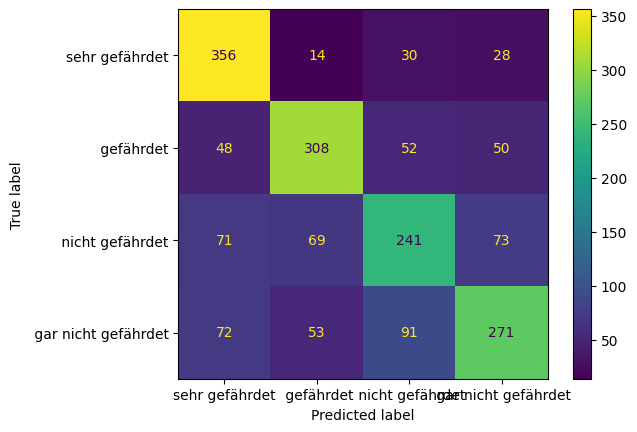

In [ ]:
#KNN
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    grid_lr, X_test, y_test, labels=[0, 1, 2, 3], display_labels=['sehr gefährdet', ' gefährdet', ' nicht gefährdet', ' gar nicht gefährdet'])

**Interpretation der Matrix:**

Die Matrix ist mit unseren 4 Klassen gelabelt und wir können nun erkennen, inwiefern die tatsächliche Abwanderungsgefahr richtig vorhergesagt wurde.
Beispielsweise fallen in die Klasse "sehr gefährtdet" nach dem True Label insgesamt 428 Kunden. Unsere Prediction hat davon 356 richtig vorhergesagt. 14 wurde das Label "gefährdet" zugeordnet, während 58 als (gar) nicht gefährdet einkategorisiert wurden, obwohl diese eigentlich sehr abwanderungsgefährdet sind.

###**Logistische Regression**

Mit der logistischen Regression wird die Vorhersage der Wahrscheinlichkeit (Wert zwischen 0 bis 1), dass eine Instanz einer bestimmten Klasse angehört, ermöglicht.

Nachdem das Modell trainiert wurde, kann es zudem verwendet werden, um Vorhersagen für neue, unbeschriftete Daten zu machen.

####**y skaliert, X unskaliert - ohne Ergebnis**

In [ ]:
#from sklearn.linear_model import LogisticRegression
#logistic = LogisticRegression(random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y_skaliert, test_size=0.2, random_state=123)

In [ ]:
#logistic.fit(X_train, y_train)
#funktioniert nicht, da  trying to apply a classification algorithm or task on a target variable with numeric values instead of discrete labels.

####**y unskaliert, X unskaliert**

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
logistic.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
Ergebnisse_log_y_unskaliert = evaluate(logistic, X_test, y_test) #accuracy = 0.61

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       428
           1       0.42      0.52      0.46       458
           2       0.52      0.38      0.44       454
           3       0.57      0.56      0.57       487

    accuracy                           0.61      1827
   macro avg       0.62      0.61      0.61      1827
weighted avg       0.61      0.61      0.60      1827



####**y unskaliert; X skaliert ohne Dummies**

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_skaliert_ohneDummies, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
logistic.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
Ergebnisse_log_y_unskaliert_X_ohne_Dummies = evaluate(logistic, X_test, y_test) #accuracy=0.61

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       428
           1       0.42      0.52      0.47       458
           2       0.52      0.38      0.44       454
           3       0.58      0.57      0.58       487

    accuracy                           0.61      1827
   macro avg       0.62      0.62      0.61      1827
weighted avg       0.61      0.61      0.61      1827



 **Ergebnis:** y unskaliert und X skaliert ohne Dummies ist das beste Vorgehen bei der logistischen Regression mit einer Accuracy von 0,61.



####**Hyperparameter Tuning**

Wir versuchen nun, die Accuracy zu verbessern.

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from sklearn.model_selection import GridSearchCV
model = logistic
grid_vals = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
}
grid_lr = GridSearchCV(estimator=logistic, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)
grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.62 statt 0.61

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

              precision    recall  f1-score   support

           0       0.66      0.96      0.78       428
           1       0.64      0.55      0.59       458
           2       0.60      0.37      0.46       454
           3       0.57      0.61      0.59       487

    accuracy                           0.62      1827
   macro avg       0.62      0.62      0.61      1827
weighted avg       0.61      0.62      0.60      1827



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceba

**Ergebnis:** Das Hyperparameter Tuning hat die Accuracy von 0,61 auf 0,62 verbessert.




####**Error Analysis**

Wir führen eine Error Analysis durch, um die Leistung eines Klassifikationsmodells zu visualisieren und gleichzeitig die Fehler des Modells zu erkennen und zu analysieren, damit wir mögliche  Schwachstellen oder Muster in den Fehlern identifizieren könnnen.





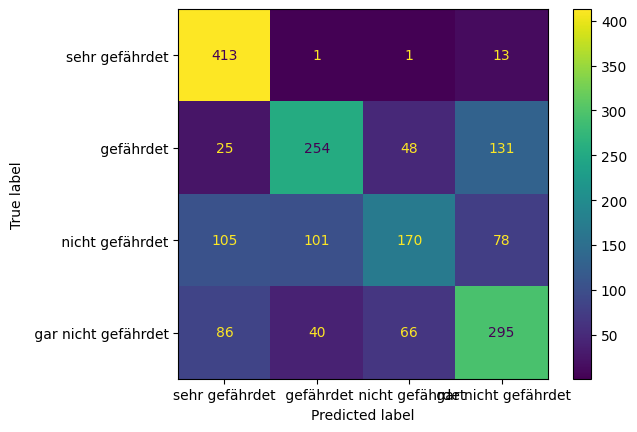

In [ ]:
#Logistische Regression
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    grid_lr, X_test, y_test, labels=[0, 1, 2, 3], display_labels=['sehr gefährdet', ' gefährdet', ' nicht gefährdet', ' gar nicht gefährdet'])

**Interpretation der Matrix:**

Die Matrix ist mit unseren 4 Klassen gelabelt und wir können nun erkennen, inwiefern die tatsächliche Abwanderungsgefahr richtig vorhergesagt wurde.

Bsp.: Von den tatsächlich 454 nicht gefährdeten wurden lediglich 170 auch in diese Kategorie predicted. 206 Kunden wurde eine höhere Gefährdung zugeschrieben, 78 eine noch geringere.

###**Decision Tree**


 Innerhalb einer Klassifikation ermöglicht ein Decision Tree die Vorhersage der Klasse eines Datenpunkts basierend auf den Werten seiner Merkmale. Das Ziel besteht also darin, die Daten anhand dieser Merkmale in möglichst homogene Klassen zu unterteilen.

Jeder innere Knoten des Baumes stellt dabei eine Entscheidung und jeder Blattknoten eine Klassenzuordnung dar.


###**y skaliert, X unskaliert - ohne Ergebnis**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y_skaliert, test_size=0.2, random_state=123)

In [ ]:
#tree.fit(X_train, y_train)
#funktioniert nicht, da  trying to apply a classification algorithm or task on a target variable with numeric values instead of discrete labels.

####**y unskaliert, X unskaliert**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
Ergebnisse_tree_y_unskaliert = evaluate(tree, X_test, y_test) #accuracy=0.92

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       428
           1       0.95      0.97      0.96       458
           2       0.84      0.88      0.86       454
           3       0.90      0.86      0.88       487

    accuracy                           0.92      1827
   macro avg       0.92      0.92      0.92      1827
weighted avg       0.92      0.92      0.92      1827



####**y unskaliert; X skaliert ohne Dummies**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_skaliert_ohneDummies, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
Ergebnisse_tree_y_unskaliert_X_ohne_Dummies = evaluate(tree, X_test, y_test) #accuracy=0.92

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       428
           1       0.95      0.97      0.96       458
           2       0.84      0.88      0.86       454
           3       0.90      0.86      0.88       487

    accuracy                           0.92      1827
   macro avg       0.92      0.92      0.92      1827
weighted avg       0.92      0.92      0.92      1827



 **Ergebnis:** y unskaliert und X skaliert ohne Dummies ist das beste Vorgehen beim Decision Tree mit einer Accuracy von 0,92.



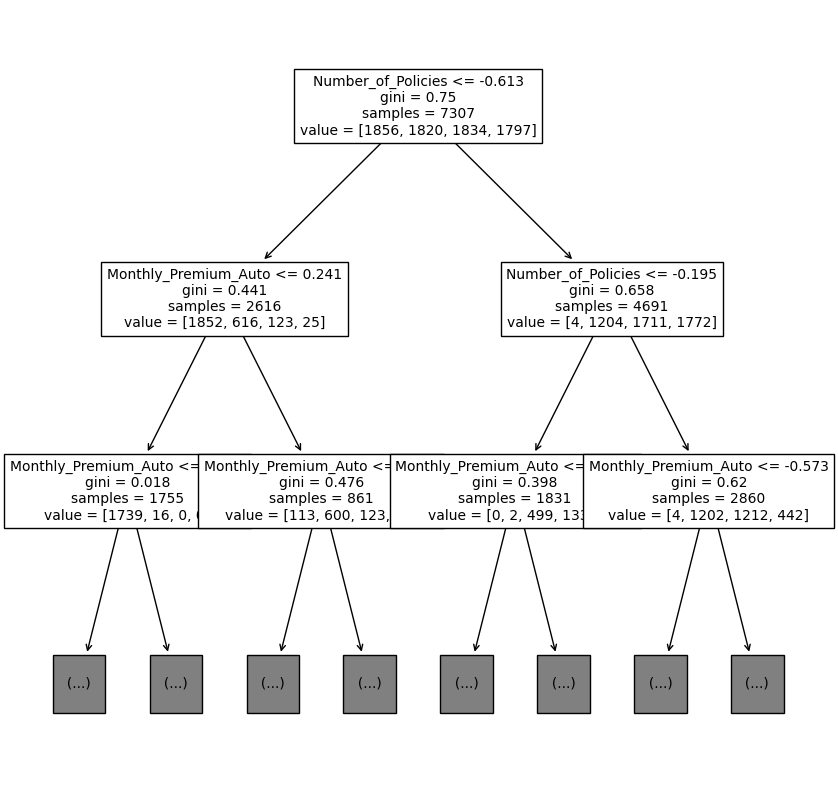

In [ ]:
from sklearn import tree as sktree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sktree.plot_tree(tree, max_depth=2, fontsize=10, feature_names=X_skaliert_ohneDummies.columns);

**Interpretation:**

Der oberste Knoten des Baumes "Number of Policies" ist der Wurzelknoten und stellt die oberste Entscheidungsregel dar. Diese kann entweder wahr oder falsch sein (binäre Verzweigung).
Trifft die Entscheidungsregel zu wird als nächstes der linke Ast hin zu Monthly Premium Auto gewählt, ansonsten wird der rechte Ast gewählt.

Insgesamt können die Variablen identifiziert werden, die den  größten Einfluss auf unsere Zeilvariable haben.






####**Hyperparameter Tuning**

Wir versuchen nun, die Accuracy zu verbessern.

In [ ]:
# V1
#from sklearn.model_selection import GridSearchCV
#model = tree
#grid_vals = {
#    'criterion': ['gini', 'entropy'],
#    'max_depth': [None, 5, 10, 20],
#}

#grid_lr = GridSearchCV(estimator=tree, param_grid=grid_vals, scoring='accuracy',
#                       cv=6, refit=True, return_train_score=True)

#grid_lr.fit(X_train, y_train)
#preds = grid_lr.best_estimator_.predict(X_test)

#grid_lr.best_params_

#evaluate(grid_lr, X_test, y_test) # 0.92 statt 0.92

In [ ]:
# V2
#from sklearn.model_selection import GridSearchCV
#model = tree
#grid_vals = {
#    'criterion': ['gini', 'entropy'],
#    'max_depth': [None, 5, 10, 20],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 5],
#}

#grid_lr = GridSearchCV(estimator=tree, param_grid=grid_vals, scoring='accuracy',
#                       cv=6, refit=True, return_train_score=True)

#grid_lr.fit(X_train, y_train)
#preds = grid_lr.best_estimator_.predict(X_test)

#grid_lr.best_params_

#evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.92

In [ ]:
# V3
from sklearn.model_selection import GridSearchCV
model = tree
grid_vals = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}

grid_lr = GridSearchCV(estimator=tree, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)

grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.92

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       428
           1       0.97      0.98      0.97       458
           2       0.82      0.94      0.88       454
           3       0.95      0.81      0.88       487

    accuracy                           0.93      1827
   macro avg       0.93      0.93      0.93      1827
weighted avg       0.93      0.93      0.93      1827



**Ergebnis:** Das Hyperparameter Tuning hat die Accuracy von 0,92 auf 0,93 verbessert.




####**Error Analysis**

Wir führen eine Error Analysis durch, um die Leistung eines Klassifikationsmodells zu visualisieren und gleichzeitig die Fehler des Modells zu erkennen und zu analysieren, damit wir mögliche  Schwachstellen oder Muster in den Fehlern identifizieren könnnen.





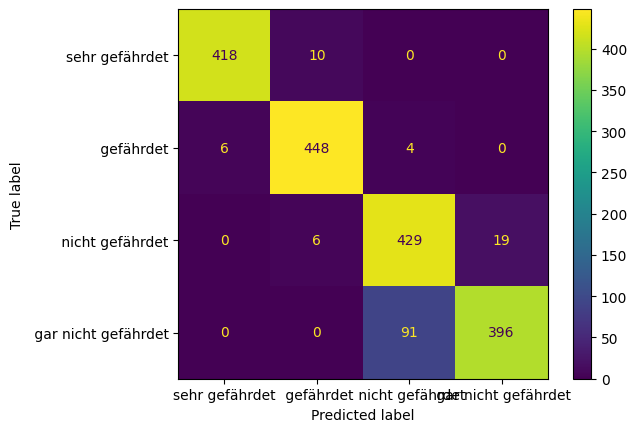

In [ ]:
#Decision Tree
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    grid_lr, X_test, y_test, labels=[0, 1, 2, 3], display_labels=['sehr gefährdet', ' gefährdet', ' nicht gefährdet', ' gar nicht gefährdet'])

Die Confusion Matrix zeigt erneut, wie viele Kunden durch die Prediction den richtigen Klassen zugeorndet werden und an welchen Stellen es Abweichungen gibt.

###**Random Forest**

Die Methode hat für uns den Vorteil, dass sie eine hohe Vorhersagegenauigkeit hat, da sie mehrere Entscheidungsbäume kombiniert.
Zudem wird Overfitting reduziert, da zufällige Stichproben und zufällige Merkmale verwendet werden.

Für die Optimierung bietet sie letztendlich den Vorteil, dass sie durch viele Hyperparameter angepasst werden kann, um die Modellleistung zu optimieren.

####**y skaliert, X unskaliert - ohne Ergebnis**

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#random_forest = RandomForestClassifier(random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y_skaliert, test_size=0.2, random_state=123)

In [ ]:
#random_forest.fit(X_train, y_train)
#funktioniert nicht, da  trying to apply a classification algorithm or task on a target variable with numeric values instead of discrete labels.

####**y unskaliert, X unskaliert**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
Ergebnisse_forest_y_unskaliert = evaluate(random_forest, X_test, y_test) #accuracy=0.93

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       428
           1       0.95      0.97      0.96       458
           2       0.85      0.90      0.87       454
           3       0.93      0.87      0.90       487

    accuracy                           0.93      1827
   macro avg       0.93      0.93      0.93      1827
weighted avg       0.93      0.93      0.93      1827



####**y unskaliert, X skaliert ohne Dummies**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_skaliert_ohneDummies, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
Ergebnisse_forest_y_unskaliert_X_ohne_Dummies = evaluate(random_forest, X_test, y_test) #accuracy=0.93

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       428
           1       0.95      0.97      0.96       458
           2       0.85      0.90      0.87       454
           3       0.93      0.87      0.90       487

    accuracy                           0.93      1827
   macro avg       0.93      0.93      0.93      1827
weighted avg       0.93      0.93      0.93      1827



 **Ergebnis:** y unskaliert und X skaliert ohne Dummies ist das beste Vorgehen beim Random Forest mit einer Accuracy von 0,93.



####**Hyperparameter Tuning**

Wir versuchen nun, die Accuracy zu verbessern.

In [ ]:
# V1
#from sklearn.model_selection import GridSearchCV
#model = random_forest
#grid_vals = {
#    'criterion': ['gini', 'entropy'],
#    'max_depth': [None, 5, 10, 20],
#}

#grid_lr = GridSearchCV(estimator=random_forest, param_grid=grid_vals, scoring='accuracy',
#                       cv=6, refit=True, return_train_score=True)

#grid_lr.fit(X_train, y_train)
#preds = grid_lr.best_estimator_.predict(X_test)

#grid_lr.best_params_

#evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.93

In [ ]:
# V2
from sklearn.model_selection import GridSearchCV
model = random_forest
grid_vals = {
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
}

grid_lr = GridSearchCV(estimator=random_forest, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)

grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.93

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       428
           1       0.95      0.97      0.96       458
           2       0.84      0.91      0.88       454
           3       0.94      0.86      0.90       487

    accuracy                           0.93      1827
   macro avg       0.93      0.93      0.93      1827
weighted avg       0.93      0.93      0.93      1827



Der Wert der Accuracy konnte durch das Tuning nicht verbessert werden.

####**Error Analysis**

Wir führen eine Error Analysis durch, um die Leistung eines Klassifikationsmodells zu visualisieren und gleichzeitig die Fehler des Modells zu erkennen und zu analysieren, damit wir mögliche  Schwachstellen oder Muster in den Fehlern identifizieren könnnen.





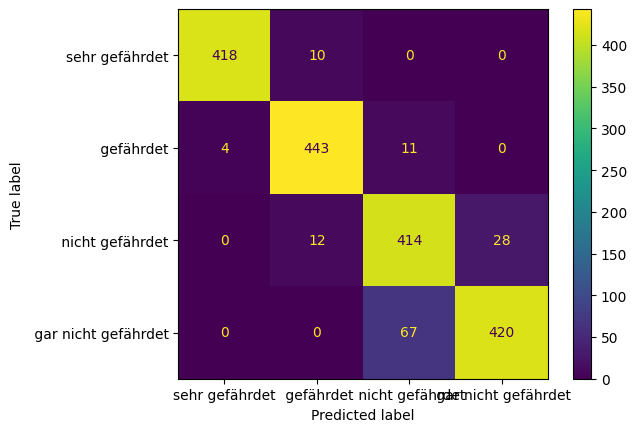

In [ ]:
#Random Forest
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    grid_lr, X_test, y_test, labels=[0, 1, 2, 3], display_labels=['sehr gefährdet', ' gefährdet', ' nicht gefährdet', ' gar nicht gefährdet'])

Die Matrix zeigt auch bei diesem Modell, dass der Großteil der Kunden mit dem richtigen Label predicted wurde und der richtigen Klasse angehört.

###**XG Boost**

Die XGBoost-Methode kann wie auch die anderen Methodsen für Klassifikationsprobleme eingesetzt werden.

Die Vorteile dieser Methode sind beispielsweise, dass die Vorhersagegenauigkeit serh hoch sind. Durch die verschiedenen Hyperparameter, die reguliert werden können, kann Overfitting reguliert werden.


####**y skaliert, X unskaliert - ohne Ergebnis**

In [ ]:
#from sklearn.ensemble import GradientBoostingClassifier
#xgb = GradientBoostingClassifier()
#X_train, X_test, y_train, y_test = train_test_split(X, y_skaliert, test_size=0.2, random_state=123)

In [ ]:
#xgb.fit(X_train, y_train)
#funktioniert nicht, da  trying to apply a classification algorithm or task on a target variable with numeric values instead of discrete labels.

####**y unskaliert, X unskaliert**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
xgb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
Ergebnisse_xg_y_unskaliert = evaluate(xgb, X_test, y_test) #accuracy=0.93

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       428
           1       0.97      0.97      0.97       458
           2       0.84      0.94      0.89       454
           3       0.95      0.85      0.90       487

    accuracy                           0.93      1827
   macro avg       0.94      0.94      0.94      1827
weighted avg       0.94      0.93      0.94      1827



####**y unskaliert, X skaliert ohne Dummies**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_skaliert_ohneDummies, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
xgb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
Ergebnisse_xg_y_unskaliert_X_ohne_Dummies = evaluate(xgb, X_test, y_test) #accuracy=0.93

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       428
           1       0.97      0.97      0.97       458
           2       0.84      0.94      0.89       454
           3       0.95      0.85      0.90       487

    accuracy                           0.93      1827
   macro avg       0.94      0.94      0.94      1827
weighted avg       0.94      0.93      0.94      1827



 **Ergebnis:** y unskaliert und X skaliert ohne Dummies ist das beste Vorgehen bei XG Boost mit einer Accuracy von 0,93.



####**Hyperparameter Tuning**

Wir versuchen nun, die Accuracy zu verbessern.

In [ ]:
# V1
#from sklearn.model_selection import GridSearchCV
#model = xgb
#grid_vals = {
#    'verbose': [0],
#    'warm_start': [False]
#}

#grid_lr = GridSearchCV(estimator=xgb, param_grid=grid_vals, scoring='accuracy',
#                       cv=6, refit=True, return_train_score=True)

#grid_lr.fit(X_train, y_train)
#preds = grid_lr.best_estimator_.predict(X_test)

#grid_lr.best_params_

#evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.93

In [ ]:
# V2
#from sklearn.model_selection import GridSearchCV
#model = xgb
#grid_vals = {
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'max_leaf_nodes': [None],
#}

#grid_lr = GridSearchCV(estimator=xgb, param_grid=grid_vals, scoring='accuracy',
#                       cv=6, refit=True, return_train_score=True)

#grid_lr.fit(X_train, y_train)
#preds = grid_lr.best_estimator_.predict(X_test)

#grid_lr.best_params_

#evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.93

In [ ]:
# V3
from sklearn.model_selection import GridSearchCV
model = xgb
grid_vals = {
    'max_depth': [3, 5, 7],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
}

grid_lr = GridSearchCV(estimator=xgb, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)

grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.93

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       428
           1       0.98      0.97      0.98       458
           2       0.86      0.91      0.89       454
           3       0.92      0.89      0.90       487

    accuracy                           0.94      1827
   macro avg       0.94      0.94      0.94      1827
weighted avg       0.94      0.94      0.94      1827



Der Wert der Accuracy konnte durch das Tuning nicht verbessert werden.

####**Error Analysis**

Wir führen eine Error Analysis durch, um die Leistung eines Klassifikationsmodells zu visualisieren und gleichzeitig die Fehler des Modells zu erkennen und zu analysieren, damit wir mögliche  Schwachstellen oder Muster in den Fehlern identifizieren könnnen.


In [ ]:
#XG Boost

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
   grid_lr, X_test, y_test, labels=[0, 1, 2, 3], display_labels=['sehr gefährdet', ' gefährdet', ' nicht gefährdet', ' gar nicht gefährdet'])

Die Matrix zeigt auch bei diesem Modell, dass der Großteil der Kunden mit dem richtigen Label predicted wurde und der richtigen Klasse angehört.

### Visualisierung der besten Methode

Aus dem Vergleich der 5 Methoden geht hervor, dass XG Boost mit einer Accuracy von 0,93 die beste ist. Zusätzlich lässt sich aus der Matrix ablesen, dass XG Boost die (sehr) abwanderungsgefährdeten Kunden am besten identifiziert und somit das Ziel unseres Projektes erfüllt.

 Aus diesem Grund betrachten wir die Performance dieser Methode nun genauer:

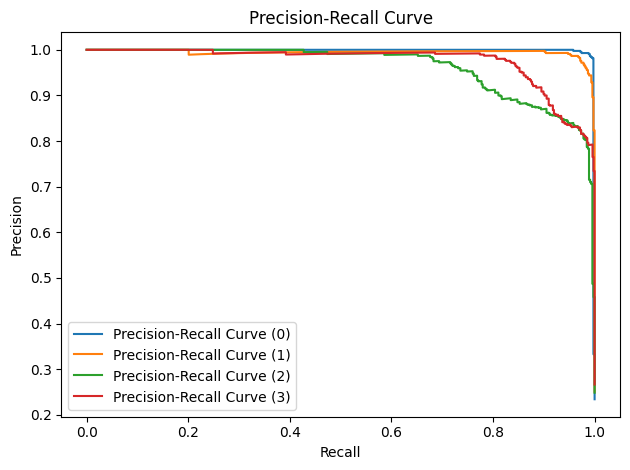

In [ ]:
#Visualisierung - Precision Recall Curve.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

In [ ]:
y_test_bin = label_binarize(y_test.values, classes=np.unique(y_test.values))

y_probs = grid_lr.predict_proba(X_test)

classes = np.unique(y_test.values)

precision = dict()
recall = dict()
avg_precision = dict()
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_probs[:, i])
    avg_precision[i] = average_precision_score(y_test_bin[:, i], y_probs[:, i])

In [ ]:
#plotten
plt.figure()
for i in range(len(classes)):
    plt.plot(recall[i], precision[i], label='Precision-Recall Curve ({})'.format(classes[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

Die Precision-Recall-Kurve wird verwendet, um zu beurteilen, wie gut ein Klassifikator in der Lage ist, positive Beispiele von negativen Beispielen zu unterscheiden.

Die Linie im Diagramm verbindet Punkte, die die Precision-Werte und die Recall-Werte abbilden.

Zudem zeigt es den Trade-off zwischen Präzision und Wiederfindungsrate. Ein idealer Klassifikator würde eine Precision von 1 und einen Recall von 1 haben, was einer Position in der oberen rechten Ecke des Diagramms entspricht.

Wir sehen, dass unsere Kurven der 4 gebildeten Klassen recht nah im oberen rechten Eck angesiedelt sind. Besonders die Klasse der (stark) gefährdeten haben sehr gute Werte.

In [ ]:
#Visualisierung ROC Kurve

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
#plotten
plt.figure()
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label='ROC Curve ({})'.format(classes[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()

NameError: ignored

**Interpretation:**

Die optimale Leistung wird erreicht, wennn sich die ROC_Kurven der oberen linken Ecke nähern und somit die Fläche unterhalb der Kurven so groß wie möglich wird. Die Leistung unseres Modells ist daher sehr hoch.

Die diagonale Referenzlinie repräsentiert die Leistung eines zufälligen Klassifikators. Da sich unsere Kurven nicht in der Nähe dieser Geraden befinden, ist unsere Vorhersagekraft wesentlich besser als ein zufälliges Raten.


### Visualisierung vom besten Modell "XG Boost nach HP Tuning (R^2=0,94) & Error Analysis

In [ ]:
# Vorhersagen für den Testdatensatz
#y_pred = grid_lr.best_estimator_.predict(x_unskaliert_mitdummys)

# Gemeinsamkeiten zwischen den falsch vorhergesagten Kunden
#false_predictions = x_unskaliert_mitdummys [y_test != y_pred]
#common_features = false_predictions.mean()

# Ausgabe der gemeinsamen Merkmale
#print("Gemeinsame Merkmale der falsch vorhergesagten Kunden:")
#print(common_features)


NameError: ignored

In [ ]:
#print("Länge von y_test:", len(y_test))
#print("Länge von x_unskaliert_mitdummys:", len(x_unskaliert_mitdummys))

Länge von y_test: 1827


NameError: ignored

In [ ]:
#print(x_unskaliert_mitdummys.columns)


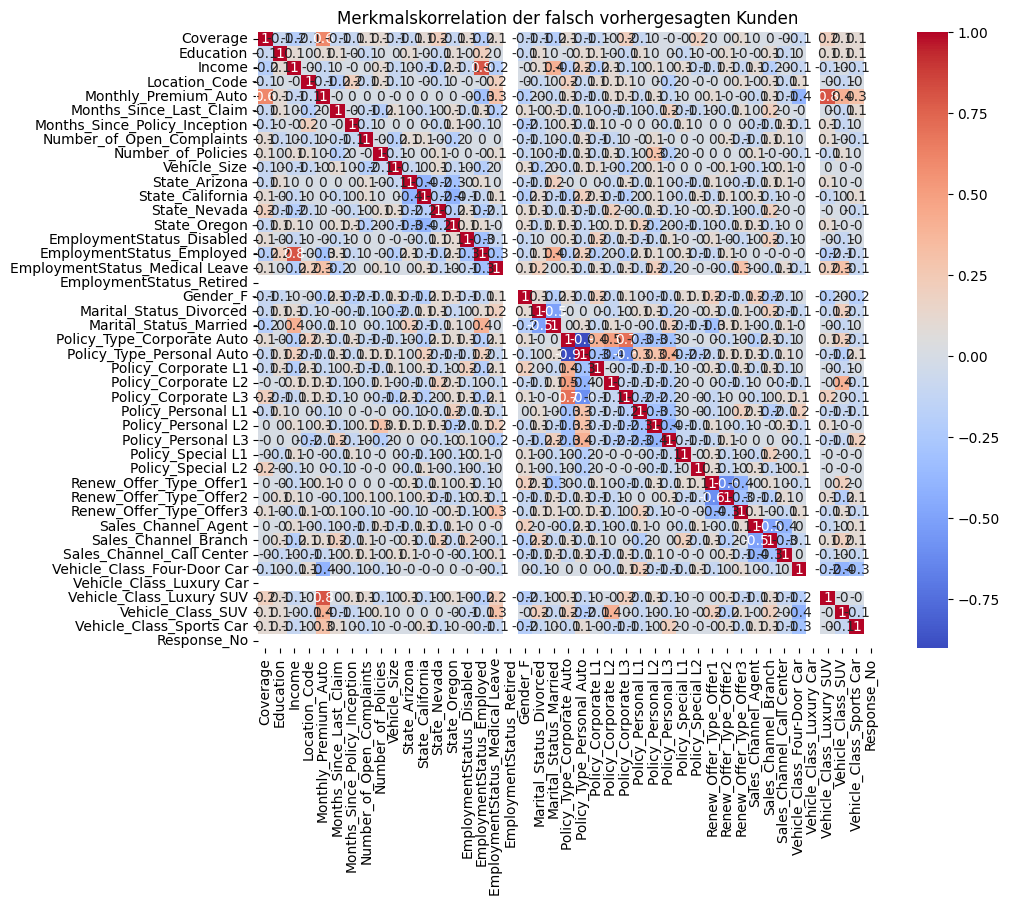

In [ ]:
# Auf 1 Nachkommastelle gerundet. Benötigen noch unskalierte X Daten.
#false_predictions = X_test[y_test != y_pred].round(1)

# Berechnen Sie die Korrelationsmatrix der Merkmale in Ihrem gefilterten Datensatz.
#correlation_matrix = false_predictions.corr().round(1)

# Visualisieren Sie die Korrelationsmatrix als Heatmap, um die Stärke und Richtung der Korrelationen zu visualisieren.
#import seaborn as sns
#import matplotlib.pyplot as plt

#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#plt.title('Merkmalskorrelation der falsch vorhergesagten Kunden')
#plt.show()


###Ergebnis der Classification

In [ ]:
from tabulate import tabulate

data = [
    ["KNN", "0.6", "0.64"],
    ["logistische Regression", "0.61", "0.62"],
    ["Decision Tree", "0.92", "0.93"],
    ["Random Forest", "0.93", "0.93"],
    ["XG Boost", "0.93", "0.93"]
]

headers = ["Methode", "vor Tuning", "nach Tuning"]

table = tabulate(data, headers, tablefmt="pipe")

print(table)

| Methode                |   vor Tuning | nach Tuning   |
|:-----------------------|-------------:|:--------------|
| KNN                    |         0.6  | 0.64          |
| logistische Regression |         0.61 | 0.62          |
| Decision Tree          |         0.92 | 0.93          |
| Random Forest          |         0.93 | 0.93          |
| XG Boost               |         0.93 | **0.93**      |


In [ ]:
# auf testdatensatz evaluieren

##Schritt 3: Multiple lineare Regression

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [ ]:
# Zielvariable und Features definieren (von Schritt 1 übernommen)
X = X_skaliert_ohneDummies
y = target_regression

In [ ]:
# Zielvariable und Features (unskaliert) definieren (von Schritt 1 übernommen)
#X = columns_to_scale_2
#y = target_regression

In [ ]:
# Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
def evaluate(reg, X_test, y_test):
  pred = reg.predict(X_test)
  print('R2:', r2_score(y_test, pred))
  print('MAE:', mean_absolute_error(y_test, pred))
  print('MSE:', mean_squared_error(y_test, pred))
  print('RMSE:', mean_squared_error(y_test, pred, squared=False))
  print('MAPE:', mean_absolute_percentage_error(y_test, pred))
  #Anpassen an unseren use-case.

In [ ]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor()
dummy.fit(X_train, y_train)
evaluate(dummy, X_test, y_test) #-0,00015 (unskaliert X); -0,00015 (skaliert x)

R2: -0.00015451008198086313
MAE: 4567.872162601002
MSE: 51544108.32649225
RMSE: 7179.422562190656
MAPE: 0.7948580996726781


Der R2-Wert ist mit -0,00015 sehr schlecht.

###**Lineare Regression**

####**Ordinary Least Squares**

In [ ]:
# Zielvariable und Features definieren (von Schritt 1 übernommen)
#X = X_skaliert_ohneDummies
#y = target_regression

In [ ]:
# Zielvariable und Features (unskaliert) definieren (von Schritt 1 übernommen)
X = columns_to_scale_2
y = target_regression

In [ ]:
# Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.pipeline import make_pipeline
linear_scaled = make_pipeline(scaler, linear)
linear_scaled.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
evaluate(linear_scaled, X_test, y_test) # 0,159 (x skaliert) -> 0,152 (x unskaliert)

R2: 0.1524615876046227
MAE: 4010.4147852339656
MSE: 43678862.914680816
RMSE: 6608.998631765694
MAPE: 0.6221989804060126


#####**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
grid = {'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001],
        'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500, 1750],
        'max_depth': [2, 3, 4, 5, 6, 7]}

In [ ]:
#OLS HP Tuning schlägt fehl weil es kein HP tuning braucht! Gibt...

# setting n_jobs=-1 will ensure that sklearn uses all available cpu cores
#Für die Regression mit der Methode Ordinary Least Squares (OLS) gibt es keinen Hyperparameter, den du optimieren musst.
#OLS ist ein lineares Regressionsmodell,
#das die besten Schätzwerte für die Regressionskoeffizienten auf Basis der gegebenen Daten berechnet.


#optimized_xgb = RandomizedSearchCV(xgb, grid, n_iter=100, n_jobs=-1, random_state=42, verbose=3)
#optimized_xgb.fit(X_train, y_train)

In [ ]:
#optimized_xgb.best_params_

In [ ]:
#evaluate(optimized_xgb, X_test, y_test)

####**Ridge Regression**

In [ ]:
#löschen? obsolet
#X = X_skaliert_ohneDummies
#y = target_regression
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Zielvariable und Features definieren (von Schritt 1 übernommen)
X = X_skaliert_ohneDummies
y = target_regression

In [ ]:
# Zielvariable und Features (unskaliert) definieren (von Schritt 1 übernommen)
#X = columns_to_scale_2
#y = target_regression

In [ ]:
# Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import RidgeCV
import numpy as np

In [ ]:
n_alphas = 200
alphaValues = np.logspace(-10, -1, n_alphas)

linear_ridge = make_pipeline(scaler, RidgeCV(alphas=alphaValues))

In [ ]:
linear_ridge.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-10, 1.10975250e-10, 1.23155060e-10, 1.36671636e-10,
       1.51671689e-10, 1.68318035e-10, 1.86791360e-10, 2.07292178e-10,
       2.30043012e-10, 2.55290807e-10, 2.83309610e-10, 3.14403547e-10,
       3.48910121e-10, 3.87203878e-10, 4.29700470e-10, 4.76861170e-10,
       5.29197874e-10, 5.87278661...
       9.11588830e-03, 1.01163798e-02, 1.12266777e-02, 1.24588336e-02,
       1.38262217e-02, 1.53436841e-02, 1.70276917e-02, 1.88965234e-02,
       2.09704640e-02, 2.32720248e-02, 2.58261876e-02, 2.86606762e-02,
       3.18062569e-02, 3.52970730e-02, 3.91710149e-02, 4.34701316e-02,
       4.82410870e-02, 5.35356668e-02, 5.94113398e-02, 6.59318827e-02,
       7.31680714e-02, 8.11984499e-02, 9.01101825e-02, 1.00000000e-01])))])

In [ ]:
evaluate(linear_ridge, X_test,y_test) # unskaliert x 0,152 -> skaliert x 0,159 (Besser)

R2: 0.1588175220557364
MAE: 3975.592824841739
MSE: 43351302.55219499
RMSE: 6584.170604730332
MAPE: 0.613007627070471


#####**Hyperparameter Tuning**

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge

In [ ]:
#grid = {'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001],
     #   'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500, 1750],
      #  'max_depth': [2, 3, 4, 5, 6, 7]}

In [ ]:
param_grid = {'alpha': [0.1, 1.0, 10.0],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']}

In [ ]:
ridge = Ridge()

In [ ]:
random_search = RandomizedSearchCV(ridge, param_grid, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(),
                   param_distributions={'alpha': [0.1, 1.0, 10.0],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg']})

In [ ]:
best_params = random_search.best_params_

In [ ]:
ridge_best = Ridge(alpha=best_params['alpha'], solver=best_params['solver'])
ridge_best.fit(X_train, y_train)

Ridge(alpha=10.0, solver='lsqr')

In [ ]:
score = ridge_best.score(X_test, y_test)

In [ ]:
score #-> Verbesserung von 0,159 auf -> 0,160 (x skaliert)

0.15969037269796904

In [ ]:
#optimized_xgb.best_params_

In [ ]:
#evaluate(optimized_xgb, X_test, y_test)

###**Decision Tree**

In [ ]:
# Zielvariable und Features definieren (von Schritt 1 übernommen)
X = X_skaliert_ohneDummies
y = target_regression

In [ ]:
# Zielvariable und Features (unskaliert) definieren (von Schritt 1 übernommen)
#X = columns_to_scale_2
#y = target_regression

In [ ]:
# Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
evaluate(tree, X_test, y_test) #x skaliert = 0,491 -> x unskaliert = 0,450

R2: 0.49128045029206713
MAE: 1671.9540956064586
MSE: 26217444.71841728
RMSE: 5120.297327149789
MAPE: 0.11732431121436006


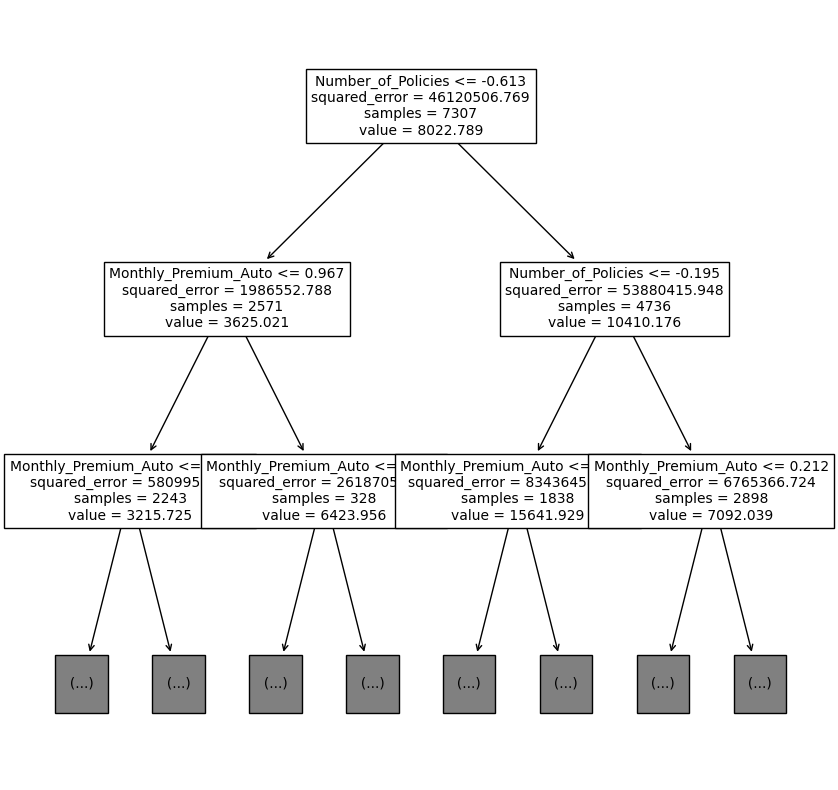

In [ ]:
from sklearn import tree as sktree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sktree.plot_tree(tree, max_depth=2, fontsize=10, feature_names=X.columns);

In [ ]:
df['Number_of_Policies'].unique()

array([1, 8, 2, 7, 9, 4, 3, 6, 5])

In [ ]:
predictions = tree.predict(X_test)
df_with_predictions = pd.concat([X_test, y_test], axis='columns')
df_with_predictions = pd.concat([df_with_predictions, pd.DataFrame(predictions, columns=['Prediction'], index=df_with_predictions.index)], axis=1)

In [ ]:
df_with_predictions = df_with_predictions.sort_values(by='Number_of_Policies')

In [ ]:
x_decisiontree = df_1.loc[:, 'Number_of_Policies']

In [ ]:
x_decisiontree

0       1
1       8
2       2
3       7
4       1
       ..
9129    2
9130    1
9131    2
9132    3
9133    1
Name: Number_of_Policies, Length: 9134, dtype: int64

Schauen ob eine Andere Darstellung gibt, da wir hier Fehler bekommen!

KeyError: ignored

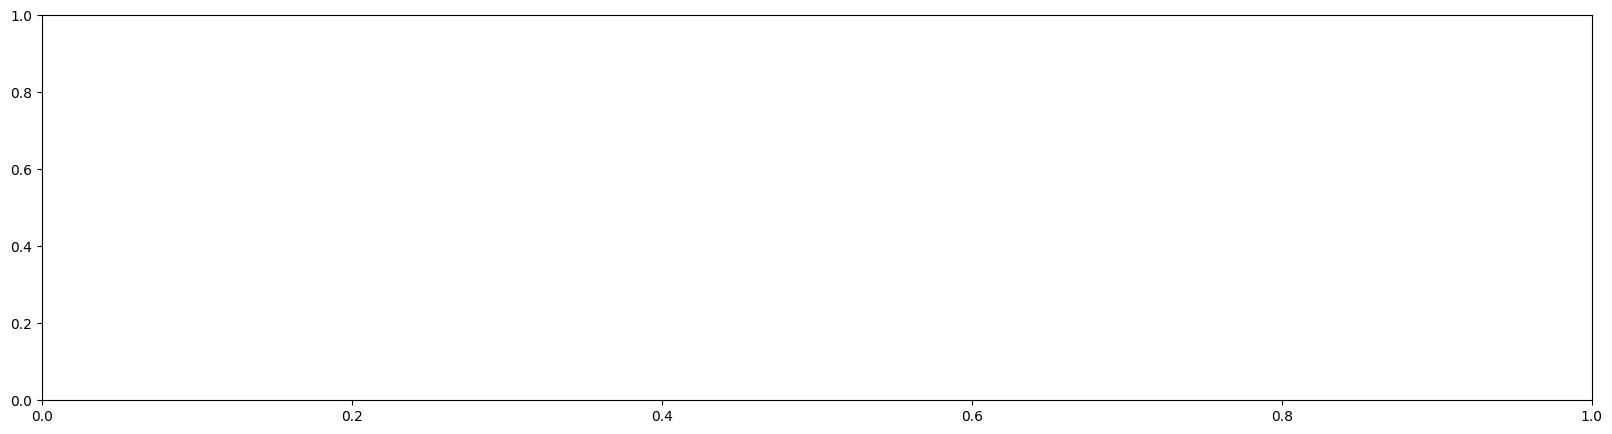

In [ ]:
ax = df_with_predictions.plot(x= x_decisiontree, y='Customer_Lifetime_Value', kind='scatter', s=20, edgecolor='black',
            c='darkorange', label='data', figsize=(20,5))

df_with_predictions.plot(x= x_decisiontree, y='Prediction', kind='line', color='cornflowerblue',
         label='prediction', linewidth=2, ax=ax)

ax.set_xlabel('Number_of_Policies')
ax.set_ylabel('CLV_churn')
ax.set_title('Decision Tree Regression')
ax.legend()


In [ ]:
df_1

#####**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Gini war davor drin. Wr brauchen Squared Error und die anderen Verfahren, da es Regression ist
grid = {'ccp_alpha': [0.1, 0.2, 0.3],
        'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],
        'max_depth': [None, 10, 20]}

In [ ]:
optimized_tree = RandomizedSearchCV(tree, grid, n_iter=3, n_jobs=-1, random_state=42, verbose=3)
optimized_tree.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=42), n_iter=3,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.1, 0.2, 0.3],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson',
                                                      'friedman_mse'],
                                        'max_depth': [None, 10, 20]},
                   random_state=42, verbose=3)

In [ ]:
optimized_tree.best_params_

{'max_depth': 10, 'criterion': 'squared_error', 'ccp_alpha': 0.2}

In [ ]:
evaluate(optimized_tree, X_test, y_test) # x skaliert von 0.491 auf 0.607

R2: 0.6070467335759617
MAE: 1548.8092410251195
MSE: 20251296.70229591
RMSE: 4500.144075726455
MAPE: 0.10808348710300689


###**Gradient Boosting**

In [ ]:
# Zielvariable und Features definieren (von Schritt 1 übernommen)
X = X_skaliert_ohneDummies
y = target_regression

In [ ]:
# Zielvariable und Features (unskaliert) definieren (von Schritt 1 übernommen)
#X = columns_to_scale_2
#y = target_regression

In [ ]:
# Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
xgb = GradientBoostingRegressor(random_state=42)
xgb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
evaluate(xgb, X_test, y_test) #x skaliert 0,674 -> x unskaliert 0,670

R2: 0.6741650978233404
MAE: 1729.767829942531
MSE: 16792274.918571435
RMSE: 4097.837834586849
MAPE: 0.13735415929755054


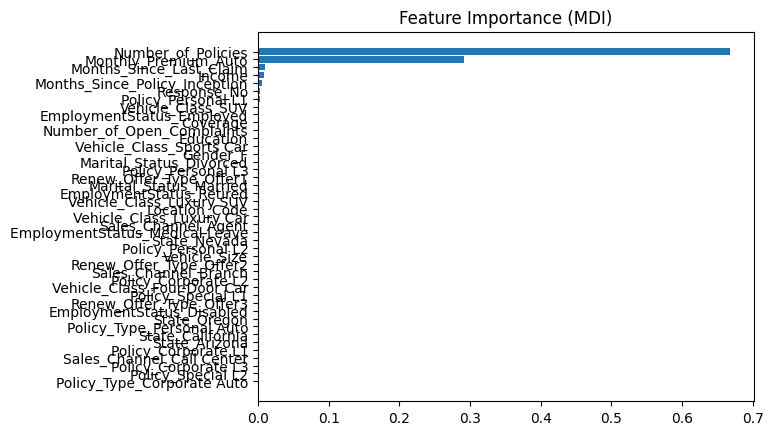

In [ ]:
feature_importance = xgb.feature_importances_

# get indices sorted by importance
sorted_idx = np.argsort(feature_importance)

# generate range from 0 to the number of features
pos = np.arange(sorted_idx.shape[0])

# 'pos' acts as our value for the 'y' axis
plt.barh(pos, feature_importance[sorted_idx], align='center')

plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
plt.show()

#####**Hyperparameter Tuning**

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [ ]:
#grid = {'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001],
      #  'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500, 1750],
      #  'max_depth': [2, 3, 4, 5, 6, 7]}

In [ ]:
  grid = { 'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(1, 10),
    'max_features': ['auto', 'sqrt']}

In [ ]:
optimized_xgb = RandomizedSearchCV(xgb, grid, n_iter=3, n_jobs=-1, random_state=42, verbose=3)
optimized_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe2a3857fa0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe2a3811ba0>},
                   random_state=42, verbose=3)

In [ ]:
optimized_xgb.best_params_

{'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 8}

In [ ]:
evaluate(optimized_xgb, X_test, y_test) #x skaliert von 0,674 auf 0,675 verbessert.

R2: 0.6751772126032077
MAE: 1727.656667275974
MSE: 16740114.424041398
RMSE: 4091.4684923681616
MAPE: 0.13615015700266825


Wir haben in der Ausführung der Methoden beobachten können, dass die Gradient Boosting-Methode nach dem Hyperparameter Tuning den besten Wert mit 0,675 im Vergleich zu den anderen Modellen erzielt hat.

Demnach führen wir für diese beste Methode die Error Analyse an. (Erklärung was Error Analyse ist und wieso wichtig... Also falsche Vorhersagen etc.)

#####**Error Analysis**

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


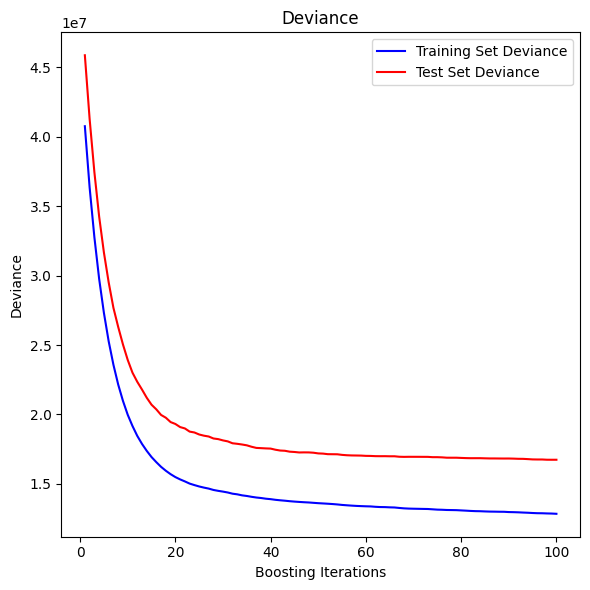

<Axes: ylabel='Frequency'>

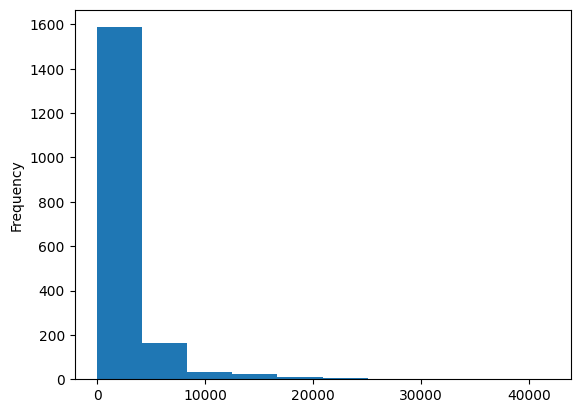

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get best xgb model (after hyperparameter tuning)
best_xgb = optimized_xgb.best_estimator_

# Staged_predict returns the error after each stage in the model
predictions = best_xgb.staged_predict(X_test)

# How many estimators were used for the model
n_estimators = len(best_xgb.estimators_)

# Calculate deviance (error) for all examples in the test set
test_score = np.zeros((n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(predictions):
    test_score[i] = best_xgb.loss_(y_test, y_pred)

# Plot the deviance
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(n_estimators) + 1, best_xgb.train_score_, 'b-', label='Training Set Deviance')
plt.plot(np.arange(n_estimators) + 1, test_score, 'r-', label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

# Make predictions on the test set
predictions = best_xgb.predict(X_test)

# Create a DataFrame with predictions and actual values
df_with_predictions = pd.concat([X_test, y_test], axis='columns')
df_with_predictions = pd.concat([df_with_predictions, pd.DataFrame(predictions, columns=['Prediction'], index=df_with_predictions.index)], axis=1)

# Calculate the absolute difference between actual and predicted values
df_with_predictions['pred_diff'] = np.abs(df_with_predictions['Customer_Lifetime_Value'] - df_with_predictions['Prediction'])

# Plot a histogram of the prediction differences
#Der Code erzeugt ein Histogramm der Vorhersageunterschiede (pred_diff) zwischen den tatsächlichen Werten (Customer_Lifetime_Value)
#und den vorhergesagten Werten (Prediction). Ein Histogramm ist ein Diagramm, das die Verteilung einer numerischen Variable visualisiert.
df_with_predictions['pred_diff'].plot(kind='hist')

In [ ]:
# get best xgb model (after hyperparam tuning)
#best_xgb = optimized_xgb.best_estimator_
# staged_predict returns the error after each stage in the model
#predictions = best_xgb.staged_predict(X_test)
# how many estimators were used for the model
#n_estimators = optimized_xgb.best_params_['n_estimators']

In [ ]:
# calculate deviance (error) for all examples in test set
#test_score = np.zeros((n_estimators,), dtype=np.float64)
#for i, y_pred in enumerate(predictions):
#    test_score[i] = best_xgb.loss_(y_test, y_pred)
#    fig = plt.figure(figsize=(6, 6))
#plt.subplot(1, 1, 1)
#plt.title('Deviance')
#plt.plot(np.arange(n_estimators) + 1, best_xgb.train_score_, 'b-',
 #        label='Training Set Deviance')
#plt.plot(np.arange(n_estimators) + 1, test_score, 'r-',
 #        label='Test Set Deviance')
#plt.legend(loc='upper right')
#plt.xlabel('Boosting Iterations')
#plt.ylabel('Deviance')
#fig.tight_layout()
#plt.show()

In [ ]:
#predictions = best_xgb.predict(X_test)
#df_with_predictions = pd.concat([X_test, y_test], axis='columns')
#df_with_predictions = pd.concat([df_with_predictions, pd.DataFrame(predictions, columns=['Prediction'], index=df_with_predictions.index)], axis=1)

In [ ]:
#df_with_predictions['pred_diff'] = np.abs(df_with_predictions['Life expectancy'] - df_with_predictions.Prediction)

In [ ]:
#df_with_predictions.pred_diff.plot(kind='hist')

In [ ]:
import scipy.stats as stats
from tabulate import tabulate

# Vorhersagen für den Testdatensatz
y_pred = optimized_xgb.best_estimator_.predict(X_test)

# Residuen berechnen
residuals = y_test - y_pred

# Erstellen einer leeren Liste für die Ergebnisse
results = []

# Iteration über die Merkmale
for feature in X.columns:
    # Extrahieren der Merkmalswerte
    feature_values = X[feature]

    # Berechnen der Steigung (Koeffizient) des Merkmals im Regressionsmodell
    coefficient = optimized_xgb.best_estimator_.feature_importances_[X.columns.get_loc(feature)]

    # Berechnen der Standardfehler des Koeffizienten
    standard_error = np.sqrt(np.mean(residuals**2)) / np.sqrt(np.sum((feature_values - feature_values.mean())**2))

    # Berechnen des t-Werts
    t_value = coefficient / standard_error

    # Berechnen des p-Werts
    degrees_of_freedom = len(y_test) - 2  # Anzahl der Freiheitsgrade (N - Anzahl der Merkmale - 1)
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_value), degrees_of_freedom))

    # Hinzufügen der Ergebnisse zur Liste
    results.append([feature, coefficient, standard_error, t_value, p_value])

# Ausgabe der Ergebnisse als Tabelle
headers = ["Feature", "Coefficient", "Standard Error", "t-Value", "p-Value"]
print(tabulate(results, headers=headers, tablefmt="fancy_grid"))


╒════════════════════════════════╤═══════════════╤══════════════════╤═════════════╤═══════════╕
│ Feature                        │   Coefficient │   Standard Error │     t-Value │   p-Value │
╞════════════════════════════════╪═══════════════╪══════════════════╪═════════════╪═══════════╡
│ Coverage                       │   0.00152623  │          42.8103 │ 3.56509e-05 │  0.999972 │
├────────────────────────────────┼───────────────┼──────────────────┼─────────────┼───────────┤
│ Education                      │   0.00144114  │          42.8103 │ 3.36634e-05 │  0.999973 │
├────────────────────────────────┼───────────────┼──────────────────┼─────────────┼───────────┤
│ Income                         │   0.00633514  │          42.8103 │ 0.000147981 │  0.999882 │
├────────────────────────────────┼───────────────┼──────────────────┼─────────────┼───────────┤
│ Location_Code                  │   8.70622e-05 │          42.8103 │ 2.03367e-06 │  0.999998 │
├────────────────────────────────┼──────

## Sigfnifikanz-Test

# Visualisierung vom besten Modell "Gradient Boosting nach HP Tuning (R^2 = 0,675) % Error Analysis


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Vorhersagen für den Testdatensatz
y_pred = optimized_xgb.best_estimator_.predict(X_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# R2-Score
r2 = r2_score(y_test, y_pred)
print("R2-Score:", r2)



#Ergebnis:
#Mean Squared Error: 16740114.424041398
#Mean Absolute Error: 1727.656667275974
#R2-Score: 0.6751772126032077

Mean Squared Error: 16740114.424041398
Mean Absolute Error: 1727.656667275974
R2-Score: 0.6751772126032077


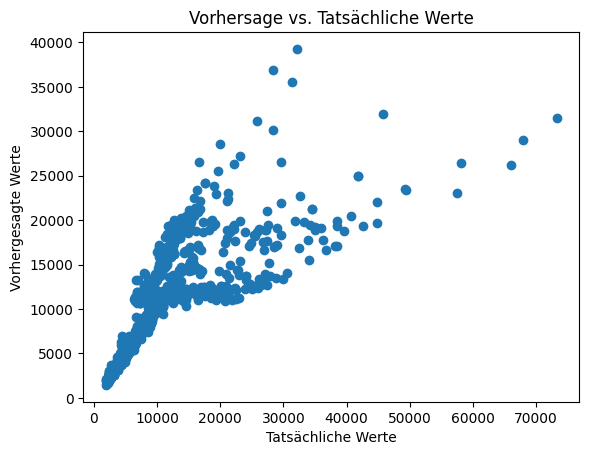

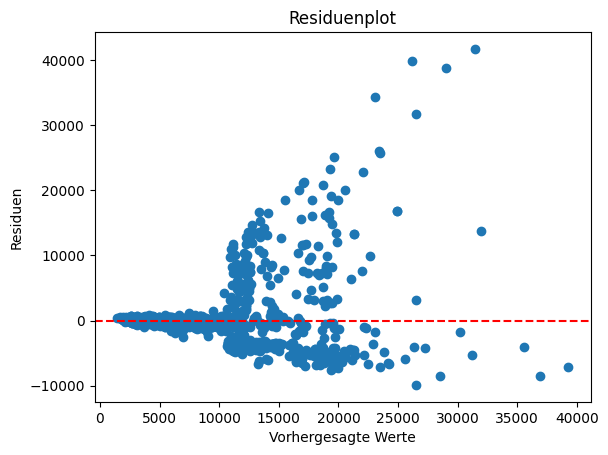

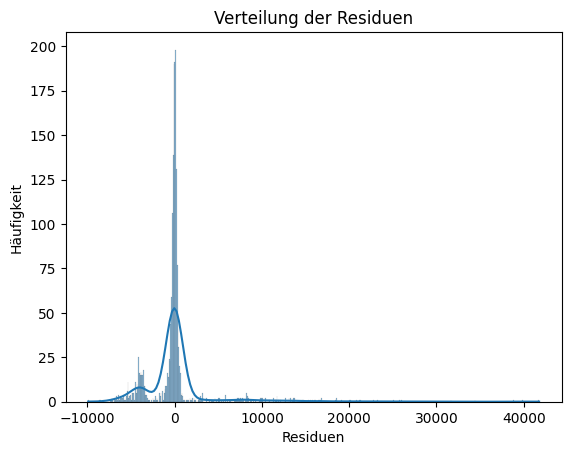

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vorhersagen für den Testdatensatz
y_pred = optimized_xgb.best_estimator_.predict(X_test)

# Streudiagramm
plt.scatter(y_test, y_pred)
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')
plt.title('Vorhersage vs. Tatsächliche Werte')
plt.show()

# Residuenplot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Vorhergesagte Werte')
plt.ylabel('Residuen')
plt.title('Residuenplot')
plt.axhline(y=0, color='r', linestyle='--')  # Horizontale Linie bei Residuen = 0
plt.show()

# Verteilungsplot der Residuen
sns.histplot(residuals, kde=True)
plt.xlabel('Residuen')
plt.ylabel('Häufigkeit')
plt.title('Verteilung der Residuen')
plt.show()

# Zeitreihenplot (falls zutreffend) --> Grafik ist zuuu wild
# Zeitvariable anpassen
#time_variable = X_test.index  # Hier anpassen, falls Ihre Zeitvariable einen anderen Namen hat
#plt.plot(time_variable, y_test, label='Tatsächliche Werte')
#plt.plot(time_variable, y_pred, label='Vorhergesagte Werte')
#plt.xlabel('Zeit')
#plt.ylabel('Werte')
#plt.title('Zeitreihenplot')
#plt.legend()
#plt.show()


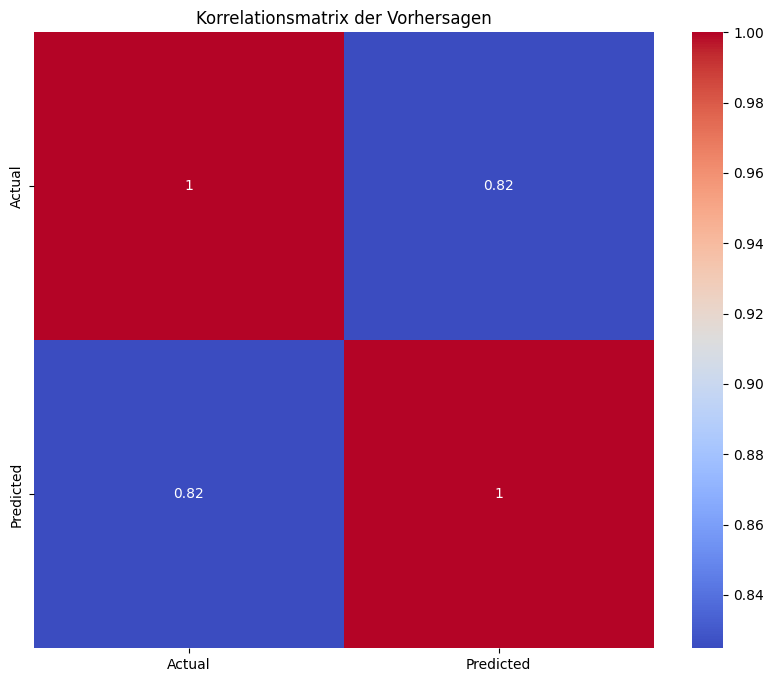

In [ ]:
import seaborn as sns # Das löschen, machct keinen Sinn?
import matplotlib.pyplot as plt

# Vorhersagen für den Testdatensatz
y_pred = optimized_xgb.best_estimator_.predict(X_test)

# Erstellen eines DataFrame mit den Vorhersagen und der tatsächlichen Zielvariable
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Berechnen der Korrelationsmatrix
correlation_matrix = results.corr()

# Visualisieren der Korrelationsmatrix als Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korrelationsmatrix der Vorhersagen')
plt.show()
